Note: you may need to restart the kernel to use updated packages.
First row c: [ 2 -1  0  1  0  0 -1  0]
Eigenvalues: [1.      +0.j 0.585786-1.j 3.      +2.j 3.414214+1.j 1.      +0.j
 3.414214-1.j 3.      -2.j 0.585786+1.j]



[notice] A new release of pip is available: 24.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


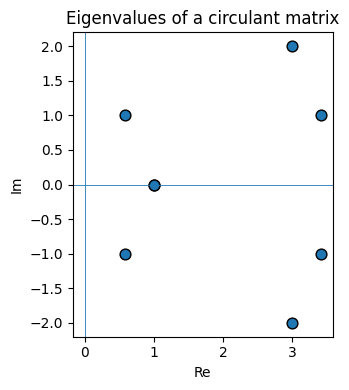

In [63]:
%pip install numpy matplotlib

import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

def circulant_from_first_row(c):
    """Return the circulant matrix with first row c."""
    c = np.asarray(c)
    n = c.size
    idx = (np.arange(n)[None, :] - np.arange(n)[:, None]) % n
    return c[idx]

def circulant_eigvals_from_dft(c):
    """Eigenvalues of circ(c) via DFT (fast & exact up to FP error)."""
    return fft(np.asarray(c))

# --- demo ---
n = 8
c = np.array([2, -1, 0, 1, 0, 0, -1, 0])  # your first row
C = circulant_from_first_row(c)
lmbda = circulant_eigvals_from_dft(c)

print("First row c:", c)
print("Eigenvalues:", np.round(lmbda, 6))

# quick plot in the complex plane
plt.figure(figsize=(4,4))
plt.scatter(lmbda.real, lmbda.imag, s=60, edgecolor='k')
plt.axhline(0, lw=0.6); plt.axvline(0, lw=0.6)
plt.gca().set_aspect('equal', 'box')
plt.title("Eigenvalues of a circulant matrix")
plt.xlabel("Re"); plt.ylabel("Im")
plt.tight_layout(); plt.show()


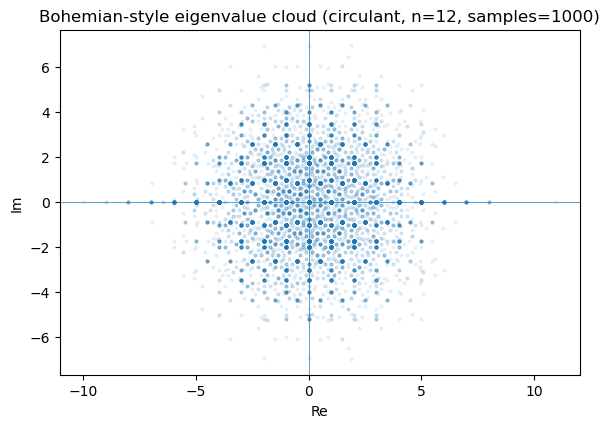

In [92]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

def random_circulant_first_row(n, values=(-1,0,1), p=None):
    """
    Draw first row entries from a small discrete set.
    p can be probabilities matching `values` (default: uniform).
    """
    vals = np.array(values)
    if p is None:
        p = np.ones(len(vals))/len(vals)
    return rng.choice(vals, size=n, p=p)

def bohemian_gallery_circulants(n=20, samples=4000, values=(-1,0,1), p=None):
    pts = []
    for _ in range(samples):
        c = random_circulant_first_row(n, values=values, p=p)
        eigs = fft(c)               # eigenvalues of circ(c)
        pts.append(eigs)
    return np.concatenate(pts)

# --- gallery demo ---
n = 12
samples = 1000
# tweak `values` or `p` for different looks, e.g. values=(-1,0,1,2) or skewed probs
points = bohemian_gallery_circulants(n=n, samples=samples, values=(-1,0,1))

plt.figure(figsize=(6,6))
plt.scatter(points.real, points.imag, s=4, alpha=0.08)
plt.axhline(0, lw=0.5); plt.axvline(0, lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.title(f"Bohemian-style eigenvalue cloud (circulant, n={n}, samples={samples})")
plt.xlabel("Re"); plt.ylabel("Im")
plt.tight_layout(); plt.show()


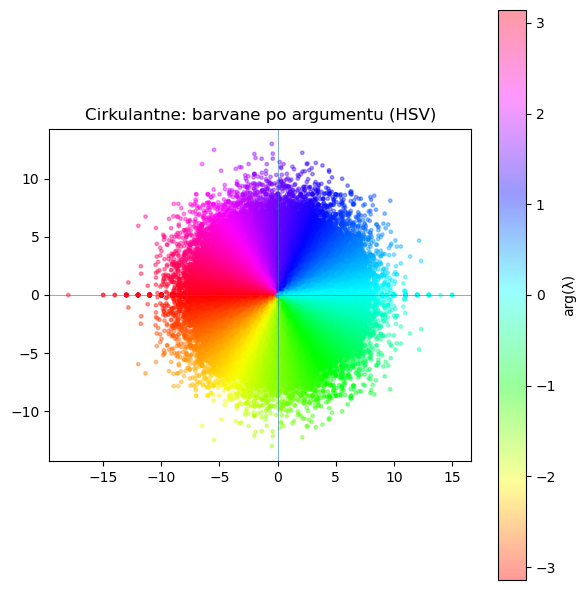

In [93]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def gallery_colored(n=30, samples=3000, values=(-1,0,1)):
    rng = np.random.default_rng(2)
    pts = []
    for _ in range(samples):
        c = rng.choice(values, size=n)
        eig = fft(c)
        pts.append(eig)
    z = np.concatenate(pts)
    ang = np.angle(z)
    plt.figure(figsize=(6,6))
    sc = plt.scatter(z.real, z.imag, s=6, c=ang, cmap="hsv", alpha=0.4)
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Cirkulantne: barvane po argumentu (HSV)")
    plt.colorbar(sc, label="arg(λ)")
    plt.tight_layout(); plt.show()

gallery_colored()


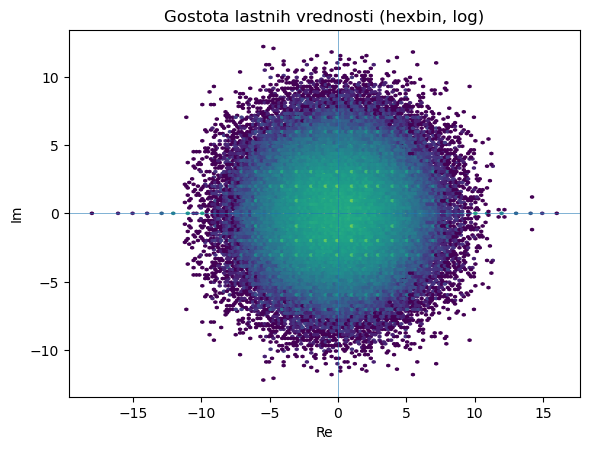

In [94]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def gallery_hexbin(n=28, samples=8000, values=(-1,0,1)):
    rng = np.random.default_rng(3)
    cloud = []
    for _ in range(samples):
        c = rng.choice(values, size=n)
        cloud.append(fft(c))
    z = np.concatenate(cloud)
    plt.figure(figsize=(6,6))
    plt.hexbin(z.real, z.imag, gridsize=160, bins='log')
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Gostota lastnih vrednosti (hexbin, log)")
    plt.xlabel("Re"); plt.ylabel("Im")
    plt.tight_layout(); plt.show()

gallery_hexbin()


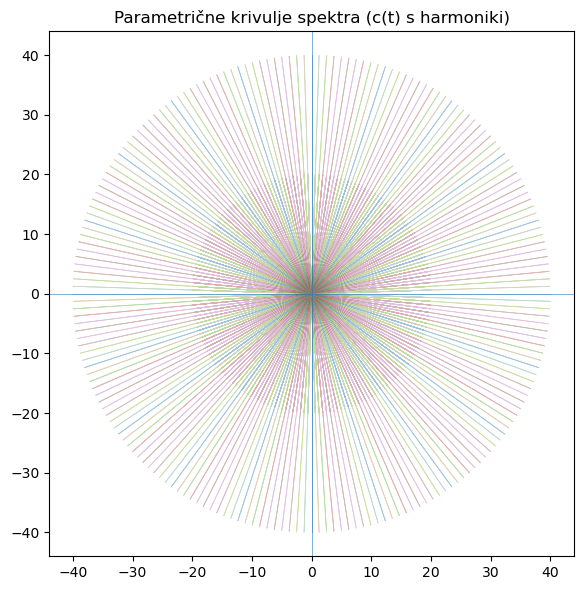

In [95]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def lace_curves(n=40, T=200, k_modes=(1,5,9), amps=(2,1,1)):
    t = np.linspace(0, 2*np.pi, T, endpoint=False)
    plt.figure(figsize=(6,6))
    for tau in t:
        c = np.zeros(n, dtype=float)
        for a,k in zip(amps, k_modes):
            c += a*np.cos(2*np.pi*k*np.arange(n)/n + tau)
        lam = fft(c)
        plt.plot(lam.real, lam.imag, lw=0.6, alpha=0.25)
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Parametrične krivulje spektra (c(t) s harmoniki)")
    plt.tight_layout(); plt.show()

lace_curves()


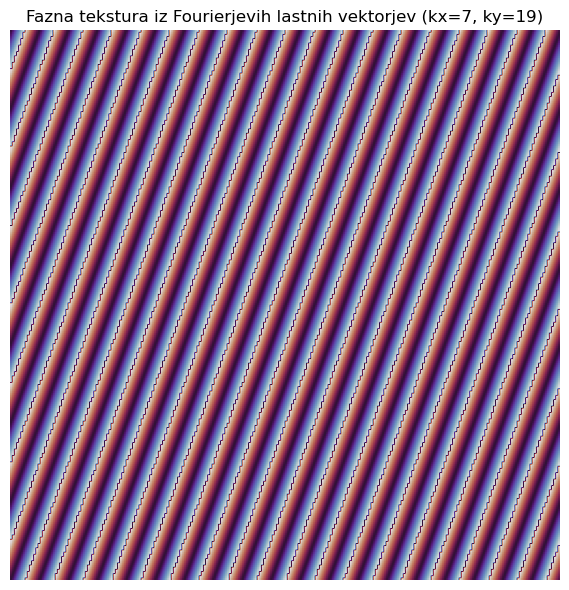

In [96]:
import numpy as np, matplotlib.pyplot as plt

def eigenvector_texture(n=256, kx=7, ky=19):
    x = np.arange(n)
    vx = np.exp(2j*np.pi*kx*x/n)
    vy = np.exp(2j*np.pi*ky*x/n)
    img = np.angle(np.outer(vx, np.conj(vy)))  # fazna razlika
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap="twilight", origin="lower")
    plt.title(f"Fazna tekstura iz Fourierjevih lastnih vektorjev (kx={kx}, ky={ky})")
    plt.axis('off'); plt.tight_layout(); plt.show()

eigenvector_texture()




Lastne vrednosti: [10.+0.j -2.+2.j -2.-2.j -2.+0.j]


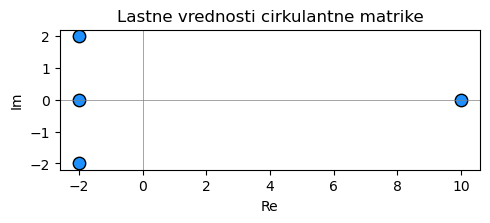

In [97]:
import numpy as np
from scipy.linalg import circulant
import matplotlib.pyplot as plt

# prva vrstica
c = np.array([1, 2, 3, 4])

# cirkulantna matrika
C = circulant(c)

# lastne vrednosti
eigvals = np.linalg.eigvals(C)

# izpis
print("Lastne vrednosti:", np.round(eigvals, 3))

# risanje v kompleksni ravnini
plt.figure(figsize=(5,5))
plt.scatter(eigvals.real, eigvals.imag, color="dodgerblue", s=80, edgecolor="k")
plt.axhline(0, color="gray", lw=0.5)
plt.axvline(0, color="gray", lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.title("Lastne vrednosti cirkulantne matrike")
plt.xlabel("Re")
plt.ylabel("Im")
plt.tight_layout()
plt.show()


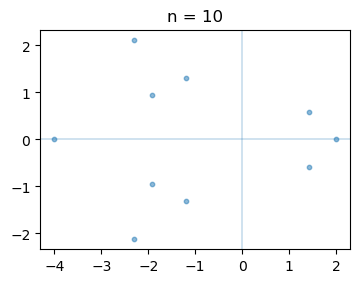

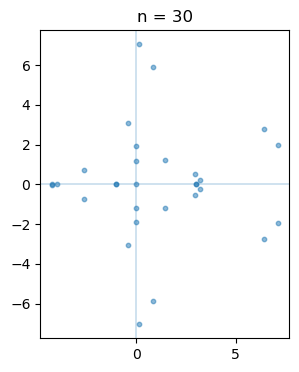

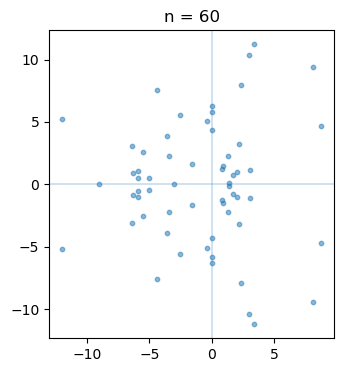

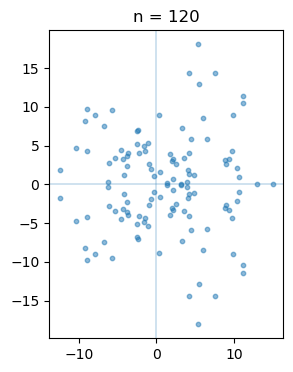

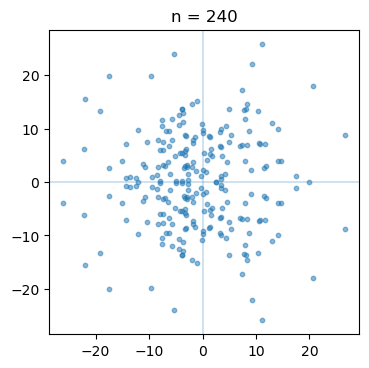

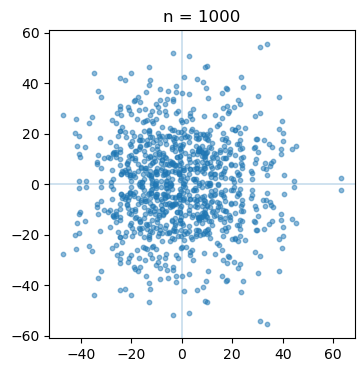

In [98]:
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import circulant

for n in [10, 30, 60,120,240,1000]:
    c = np.random.randint(-1, 2, size=n)
    eig = np.linalg.eigvals(circulant(c))
    plt.figure(figsize=(4,4))
    plt.scatter(eig.real, eig.imag, s=10, alpha=0.5)
    plt.axhline(0, lw=0.3); plt.axvline(0, lw=0.3)
    plt.gca().set_aspect('equal', 'box')
    plt.title(f"n = {n}")
    plt.show()


**1. Generiranje naključnih cirkulantnih matrik**

C:\Users\amand\AppData\Local\Temp\ipykernel_12736\342344272.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


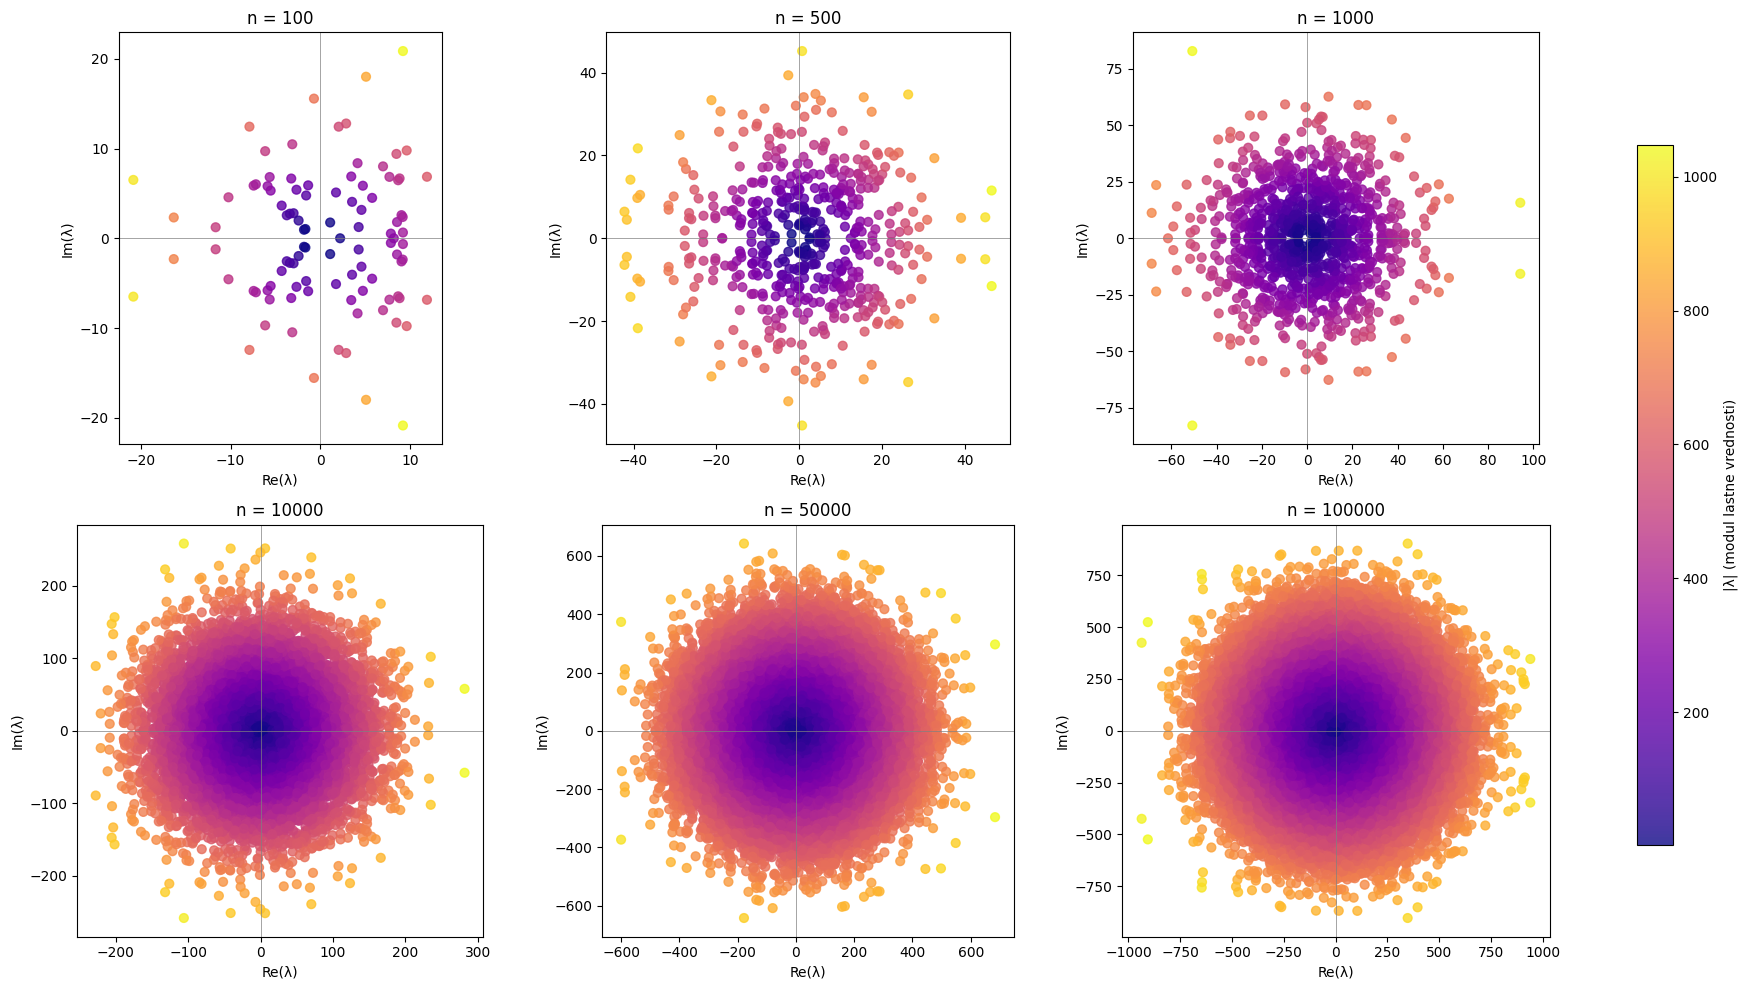

In [78]:
def plot_random_circulant_eigs_on_axes(n, ax):
    c = np.random.randn(n)
    eigvals = fft(c)
    moduli = np.abs(eigvals)

    scatter = ax.scatter(eigvals.real, eigvals.imag, 
                         c=moduli, cmap="plasma", s=40, alpha=0.8)
    ax.axhline(0, color="gray", lw=0.5)
    ax.axvline(0, color="gray", lw=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_title(f"n = {n}")
    ax.set_xlabel("Re(λ)")
    ax.set_ylabel("Im(λ)")
    return scatter

ns = [100, 500, 1000, 10000, 50000, 100000]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

scatters = []
for i, n in enumerate(ns):
    scatter = plot_random_circulant_eigs_on_axes(n, axes[i])
    scatters.append(scatter)

fig.subplots_adjust(right=0.9)  
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(scatters[-1], cax=cbar_ax)
cbar.set_label("|λ| (modul lastne vrednosti)")

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()

Opazimo: 
1. Pri večjih dimenzijah naključnih cirkulantnih matrik se lastne vrednosti porazdelijo približno v krogu okoli izhodišča.
2. Pri realnih vektorjih c so lastne vrednosti simetrične glede na realno os. 

**2. Generiranje periodičnih cirkulantnih matrik**

n=30, max(|λ|)=12.75, min(|λ|)=0.78
n=100, max(|λ|)=43.39, min(|λ|)=0.27
n=500, max(|λ|)=181.62, min(|λ|)=0.86
n=1000, max(|λ|)=483.43, min(|λ|)=0.57
n=5000, max(|λ|)=2177.56, min(|λ|)=1.21
n=10000, max(|λ|)=3619.91, min(|λ|)=0.86
n=50000, max(|λ|)=24168.74, min(|λ|)=0.13
n=100000, max(|λ|)=43550.91, min(|λ|)=0.67
n=5000000, max(|λ|)=2177565.10, min(|λ|)=0.24


C:\Users\amand\AppData\Local\Temp\ipykernel_12736\1029447614.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


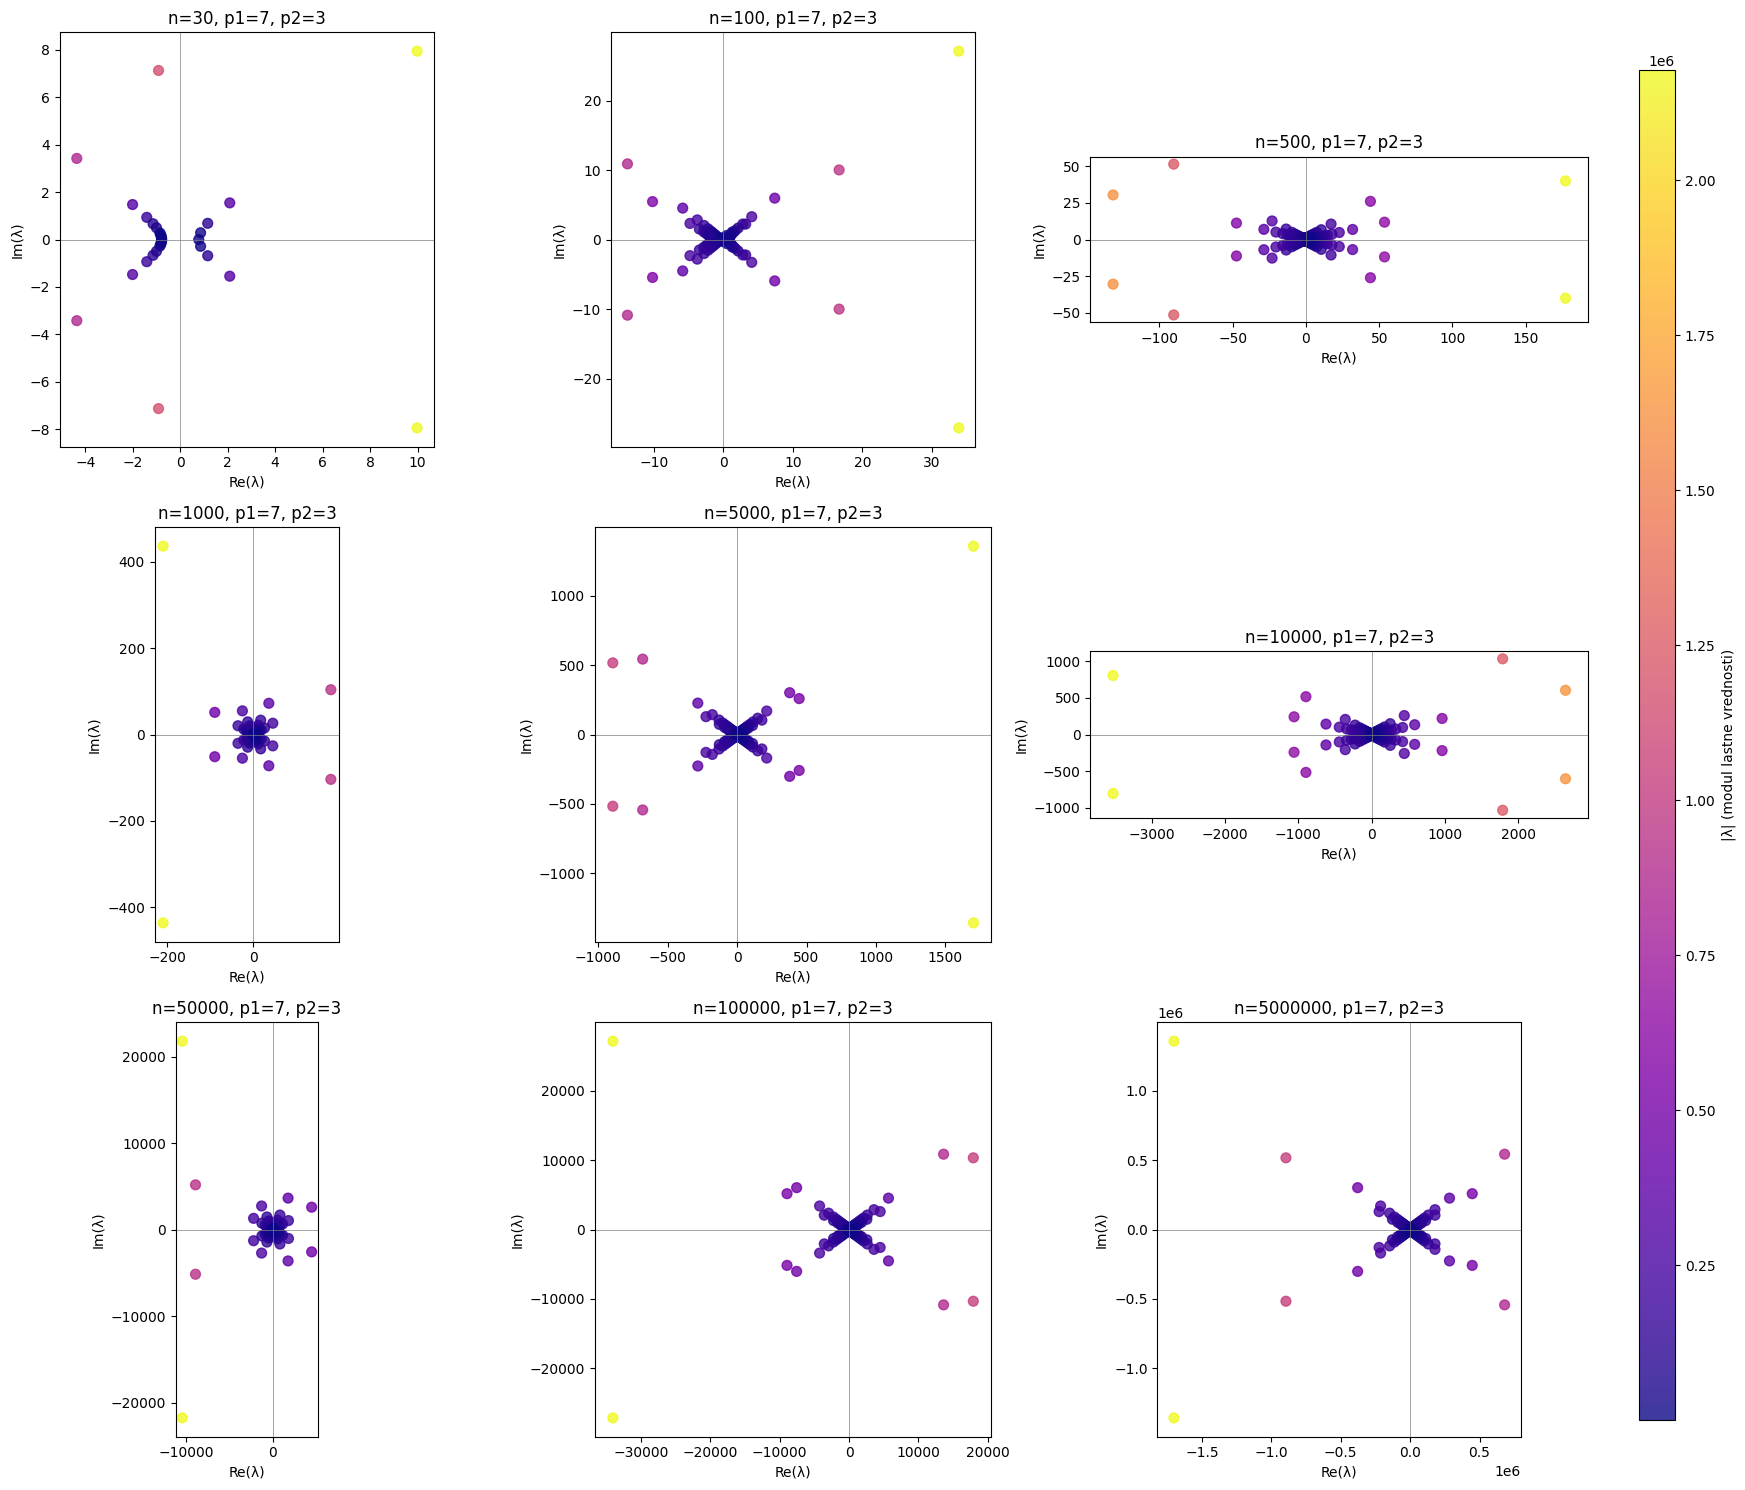

In [99]:
def plot_circulant_periodic_visible_on_axes(n, ax, p1=7, p2=3):
    j = np.arange(n)
    c = np.sin(2 * np.pi * j / p1) + 0.5*np.sin(2 * np.pi * j / p2)
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)

    print(f"n={n}, max(|λ|)={np.max(moduli):.2f}, min(|λ|)={np.min(moduli):.2f}")

    scatter = ax.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    ax.axhline(0, color="gray", lw=0.5)
    ax.axvline(0, color="gray", lw=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_title(f"n={n}, p1={p1}, p2={p2}")
    ax.set_xlabel("Re(λ)")
    ax.set_ylabel("Im(λ)")
    return scatter

ns = [30, 100, 500, 1000, 5000, 10000, 50000, 100000, 5000000]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

scatters = []
for i, n in enumerate(ns):
    scatter = plot_circulant_periodic_visible_on_axes(n, axes[i])
    scatters.append(scatter)

fig.subplots_adjust(right=0.9)  
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.9])  
cbar = fig.colorbar(scatters[-1], cax=cbar_ax)
cbar.set_label("|λ| (modul lastne vrednosti)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

C:\Users\amand\AppData\Local\Temp\ipykernel_12736\1678135323.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


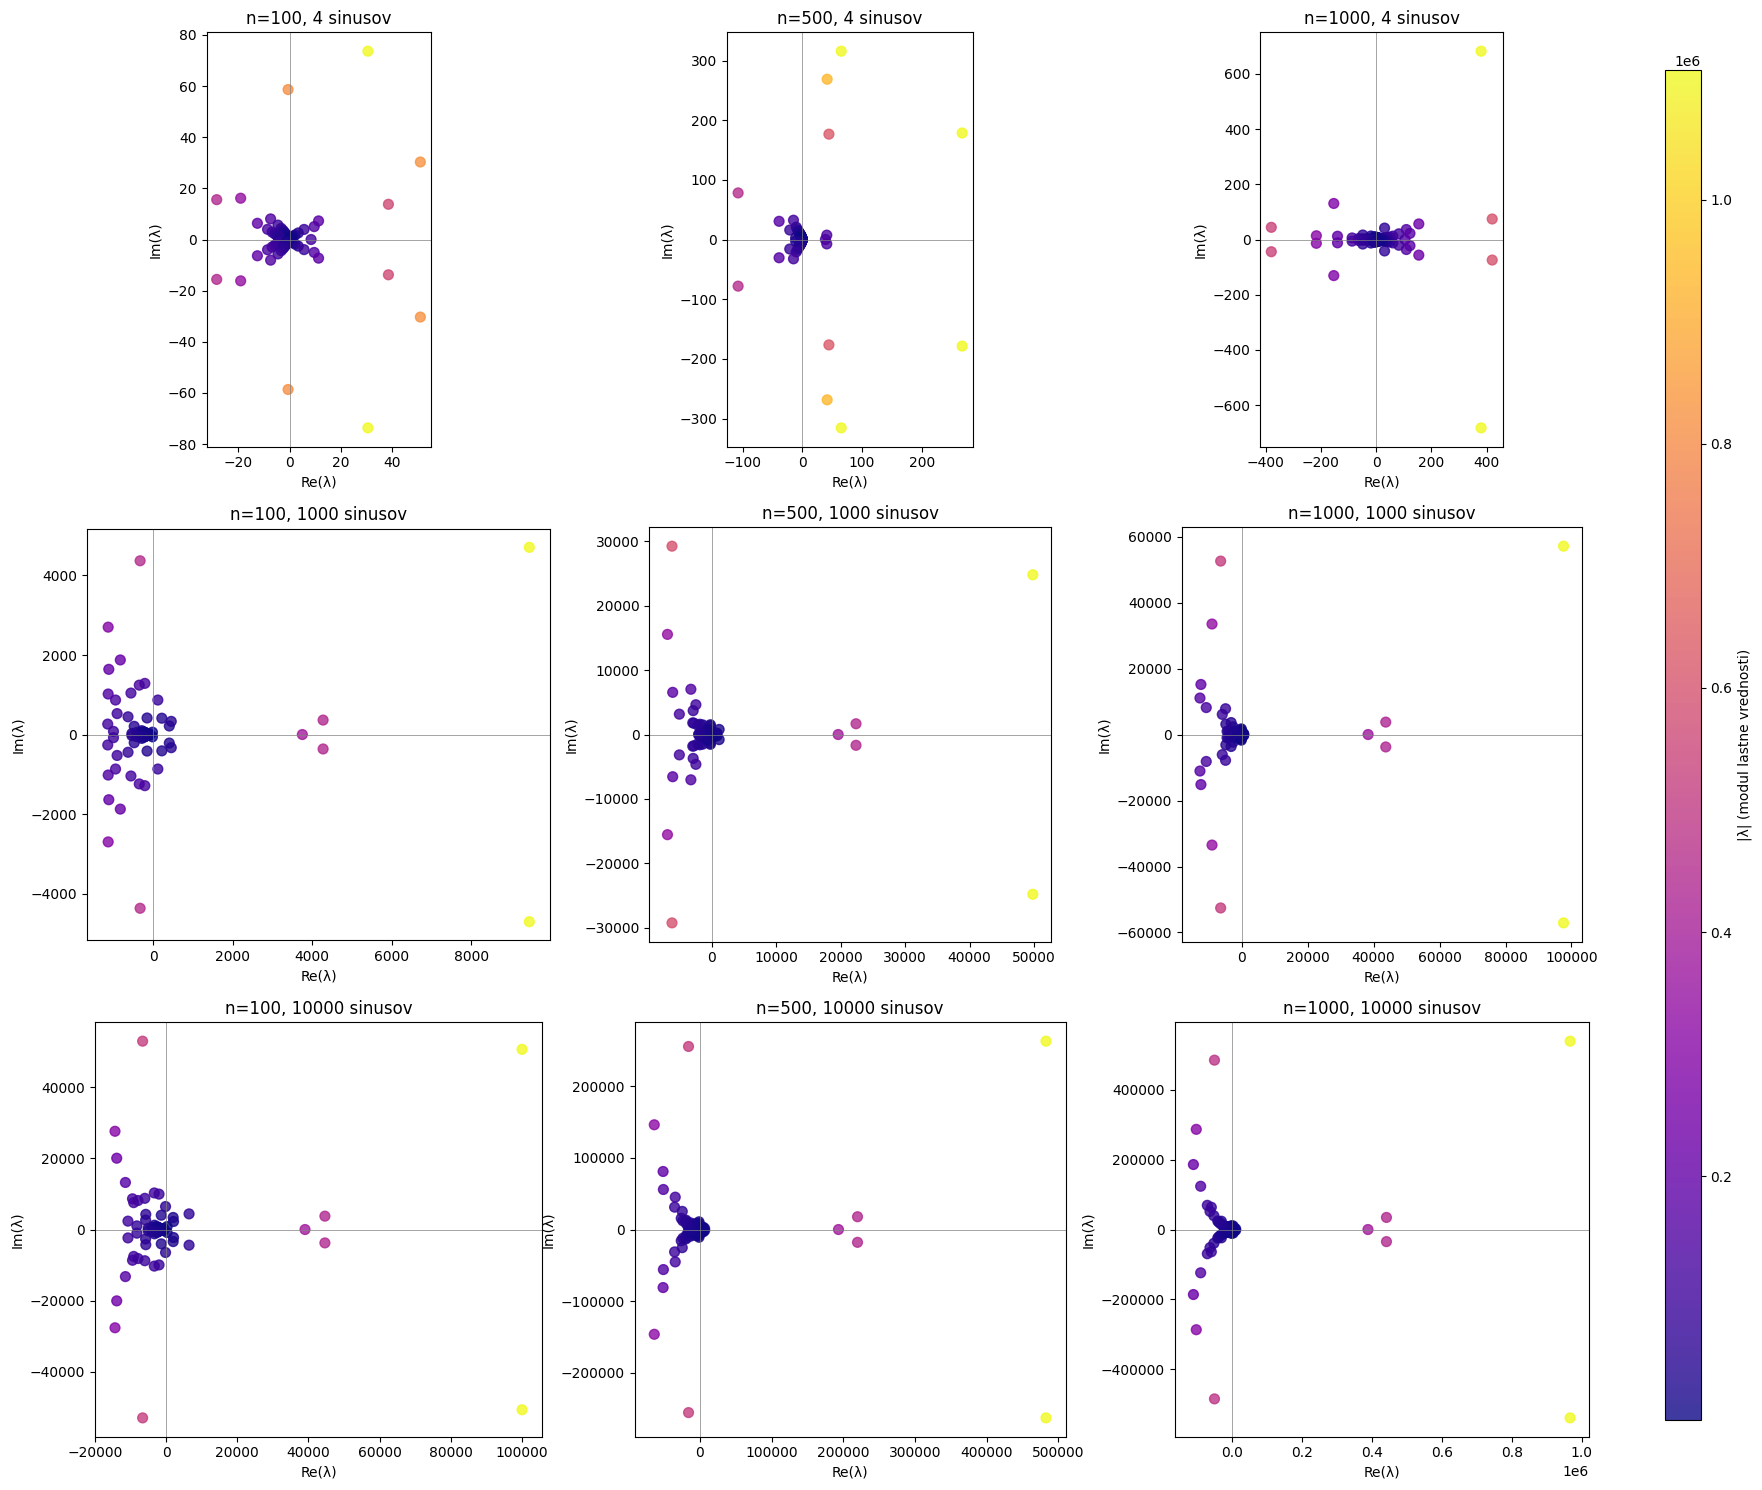

In [83]:
def plot_circulant_multi_sine_on_axes(n, num_sines, ax):
    """
    kombinacija sinusov
    """
    j = np.arange(n)
    c = np.zeros(n)
    
    rng = np.random.default_rng()
    for _ in range(num_sines):
        p = rng.integers(2, n//2)       # naključna perioda
        a = rng.uniform(0.5, 1.5)       # naključna amplituda
        c += a * np.sin(2*np.pi*j/p)
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    scatter = ax.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    ax.axhline(0, color="gray", lw=0.5)
    ax.axvline(0, color="gray", lw=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_title(f"n={n}, {num_sines} sinusov")
    ax.set_xlabel("Re(λ)")
    ax.set_ylabel("Im(λ)")
    return scatter

# seznam n in števila sinusov
params = [
    (100, 4), (500, 4), (1000, 4),
    (100, 1000), (500, 1000), (1000, 1000),
    (100, 10000), (500, 10000), (1000, 10000)
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

scatters = []
for i, (n, num_sines) in enumerate(params):
    scatter = plot_circulant_multi_sine_on_axes(n, num_sines, axes[i])
    scatters.append(scatter)

# barplot 
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.9])
cbar = fig.colorbar(scatters[-1], cax=cbar_ax)
cbar.set_label("|λ| (modul lastne vrednosti)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


C:\Users\amand\AppData\Local\Temp\ipykernel_12736\4027567315.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


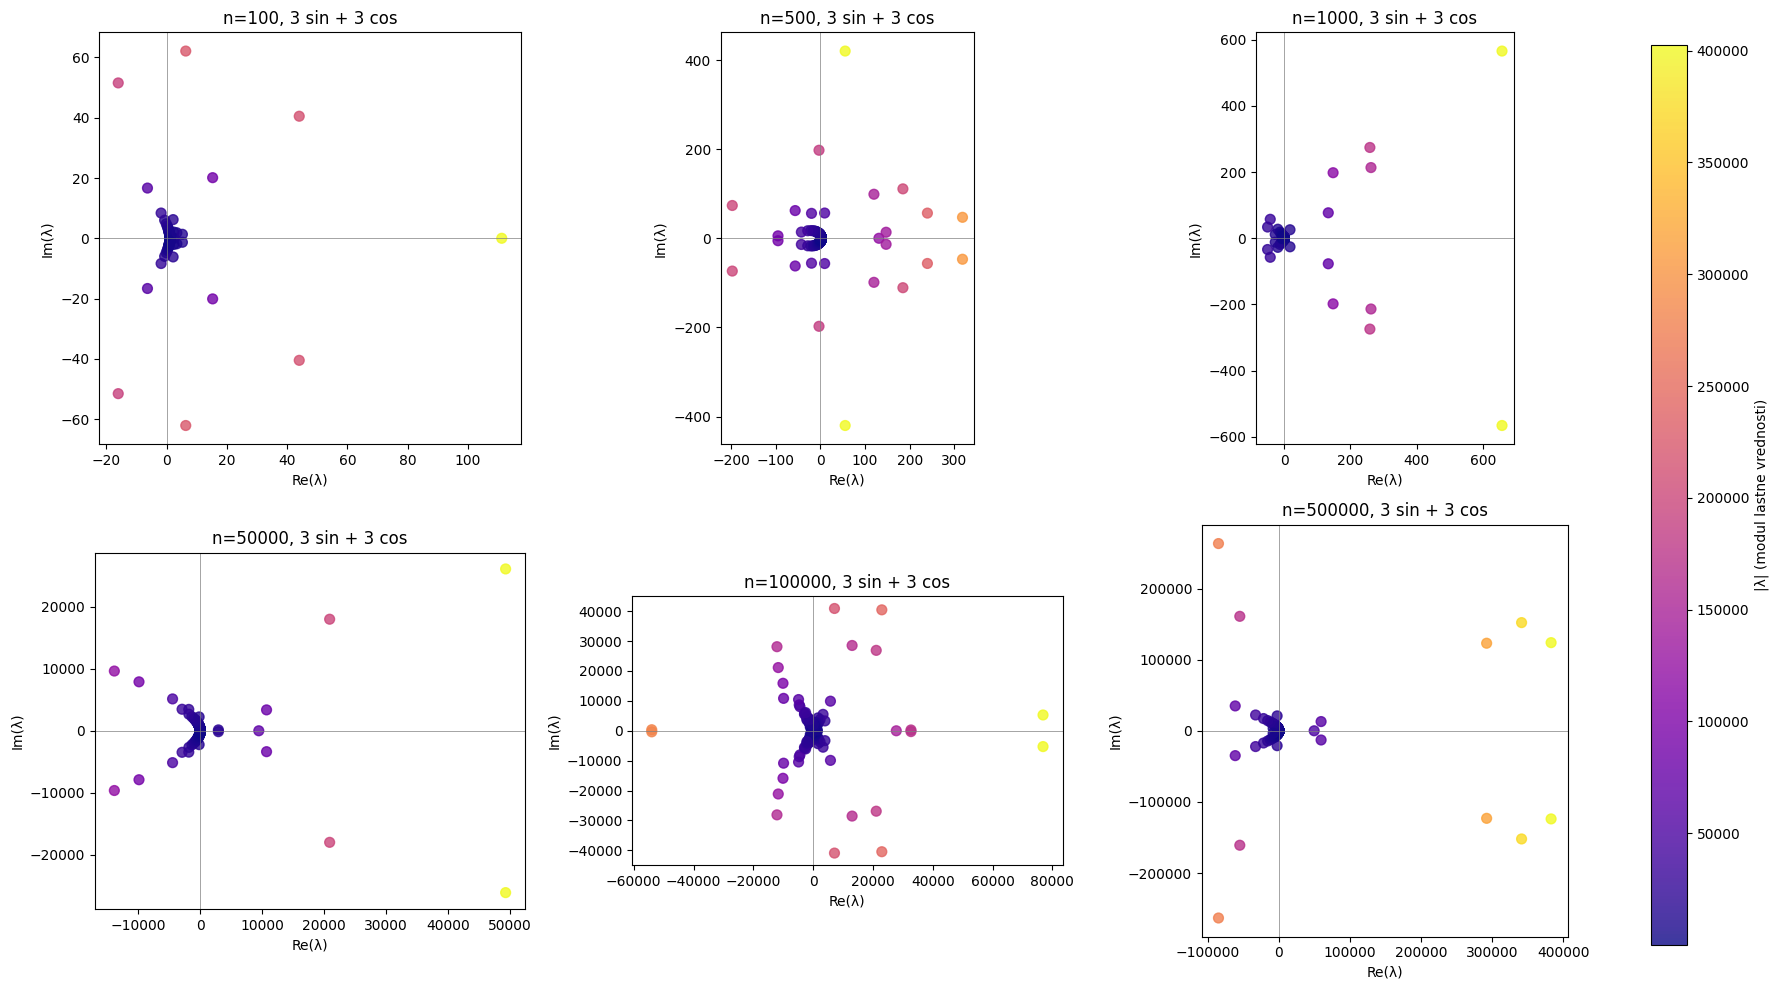

In [84]:
def plot_circulant_sin_cos_on_axes(n, num_sines, num_cosines, ax):
    """
    kombinacija naključnih sinusov in kosinusov
    """
    j = np.arange(n)
    c = np.zeros(n)
    rng = np.random.default_rng()
    
    # naključni sinusi
    for _ in range(num_sines):
        p = rng.integers(2, n//2)
        a = rng.uniform(0.5, 1.5)
        c += a * np.sin(2 * np.pi * j / p)
    
    # naključni kosinusi
    for _ in range(num_cosines):
        p = rng.integers(2, n//2)
        a = rng.uniform(0.5, 1.5)
        c += a * np.cos(2 * np.pi * j / p)
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    scatter = ax.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    ax.axhline(0, color="gray", lw=0.5)
    ax.axvline(0, color="gray", lw=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_title(f"n={n}, {num_sines} sin + {num_cosines} cos")
    ax.set_xlabel("Re(λ)")
    ax.set_ylabel("Im(λ)")
    return scatter


ns = [100, 500, 1000, 50000, 100000, 500000]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

scatters = []
for i, n in enumerate(ns):
    scatter = plot_circulant_sin_cos_on_axes(n, num_sines=3, num_cosines=3, ax=axes[i])
    scatters.append(scatter)


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.9])
cbar = fig.colorbar(scatters[-1], cax=cbar_ax)
cbar.set_label("|λ| (modul lastne vrednosti)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


Opazimo obliko "hiperbol".

**3. Generiranje cirkulantnih matrik, kjer je prva vrstica kombinacija različnih funkcij**

C:\Users\amand\AppData\Local\Temp\ipykernel_12736\4107427711.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


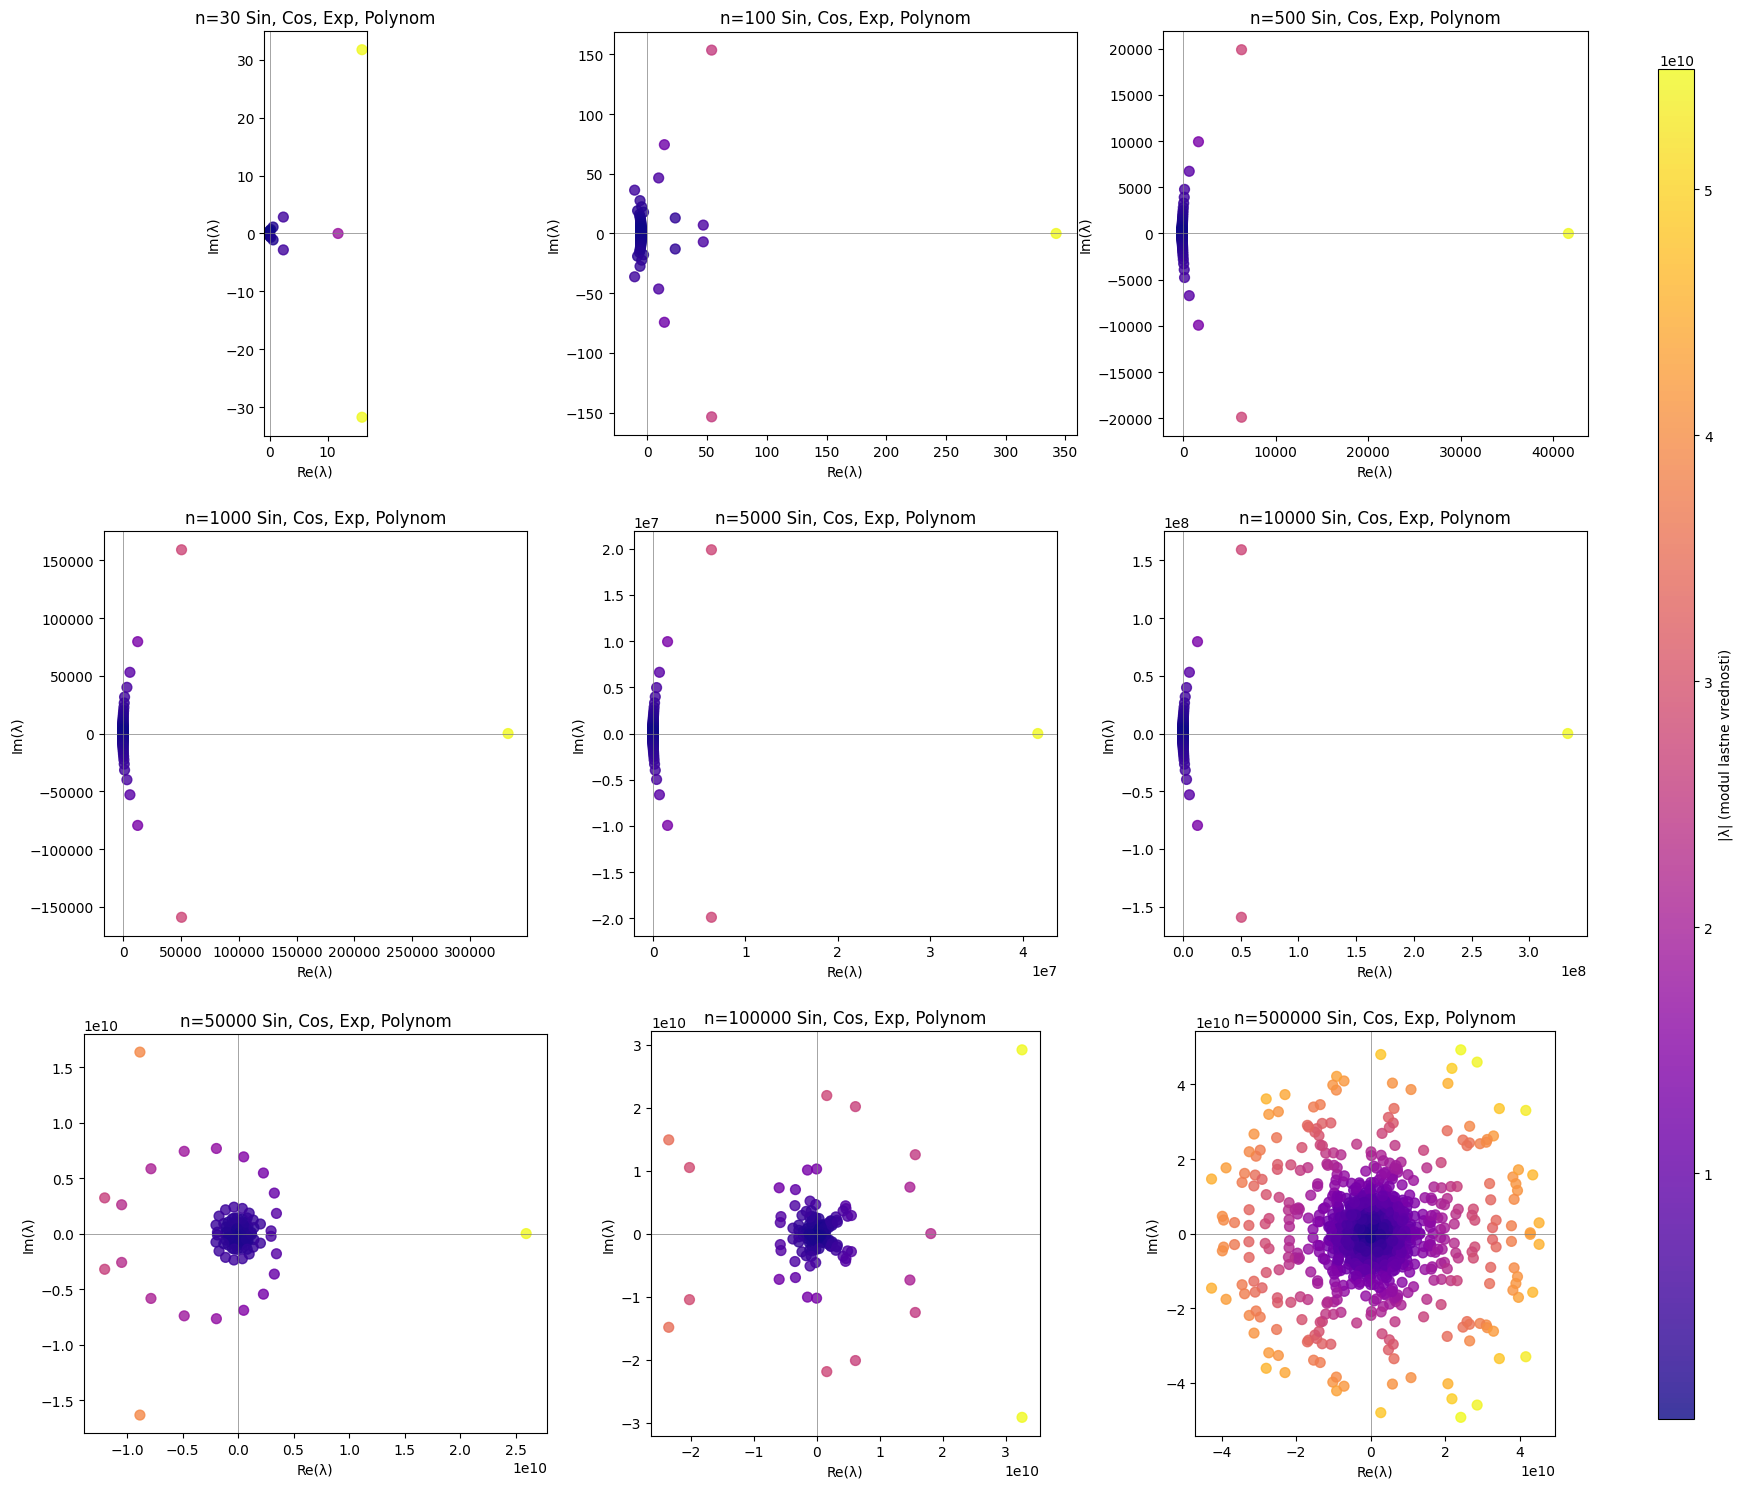

In [85]:
def plot_circulant_mixed_functions_on_axes(n, ax):
    """
    kombinacija:
    - sinusov
    - kosinusov
    - eksponentnih členov
    - polinomskih členov
    """
    j = np.arange(n)
    c = np.zeros(n)
    rng = np.random.default_rng()
    
    # nekaj sinusov in kosinusov
    for _ in range(2):
        p = rng.integers(2, n//2)
        a = rng.uniform(0.5, 1.5)
        c += a * np.sin(2*np.pi*j/p) + a*0.5 * np.cos(2*np.pi*j/p)
    
    # eksponentni člen (modul < 1, da ne eksplodira)
    c += 0.5 * np.exp(-j / (0.2*n))
    
    # polinomski člen
    c += 0.001 * j**2  # majhen kvadratni člen
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    scatter = ax.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    ax.axhline(0, color="gray", lw=0.5)
    ax.axvline(0, color="gray", lw=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_title(f"n={n} Sin, Cos, Exp, Polynom")
    ax.set_xlabel("Re(λ)")
    ax.set_ylabel("Im(λ)")
    return scatter

# Seznam n
ns = [30, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

scatters = []
for i, n in enumerate(ns):
    scatter = plot_circulant_mixed_functions_on_axes(n, axes[i])
    scatters.append(scatter)


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.9])
cbar = fig.colorbar(scatters[-1], cax=cbar_ax)
cbar.set_label("|λ| (modul lastne vrednosti)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

Opazimo nekaj zelo zanimivega. Pri majhnih n (30, 100, 500, 1000, 5000, 10000) so oblike podobne hiperbolam. Za večje n (50000, 100000, 500000) pa začnejo oblike spominjati na krog.  

 PARSELOVA ENAČBA + CLI

**4. Generiranje zvezdnih cirkulantnih matrik**

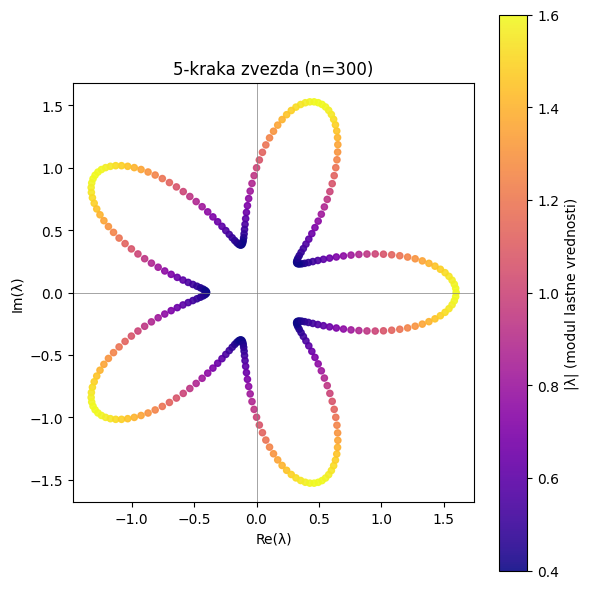

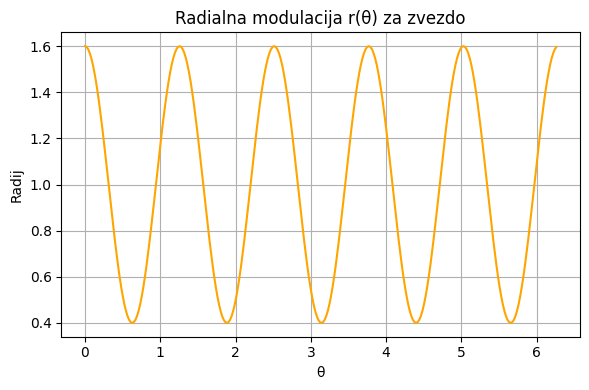

primer vrednosti prve vrstice c (prvih 8 elementov):
c[0] = -6.753857e-17+3.305364e-17j
c[1] = -6.091055e-17-1.803923e-17j
c[2] = -5.828671e-17+1.829693e-17j
c[3] = -2.553513e-17+1.980877e-18j
c[4] = 3.000000e-01+1.575512e-16j
c[5] = 2.989642e-17+5.897072e-17j
c[6] = 5.625130e-17+3.546553e-17j
c[7] = 5.324027e-18-2.160732e-17j


In [ ]:
n = 300
m = 5   # število krakov zvezde

# naredimo želene lastne vrednosti (λ_k) kot radialno modulirano krožno krivuljo
k = np.arange(n)
theta = 2*np.pi*k/n

# radialna modulacija:  radij + cos(m*theta) -> m krakov
rad = 1.0 + 0.6 * np.cos(m * theta)

# faza poteka z theta tako, da točke obkrožijo en krog, radij pa daje krake
lam = rad * np.exp(1j * theta)

# iz λ naredimo prvo vrstico c = ifft(λ)
c = ifft(lam)

# preverimo, če FFT(c) vrne nazaj λ (razen numeričnih napak)
recons = fft(c)
moduli = np.abs(recons)

#  PLOT 1: ZVEZDA 
plt.figure(figsize=(6,6))
scatter = plt.scatter(recons.real, recons.imag, c=moduli, cmap='plasma', s=20, alpha=0.9)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.colorbar(scatter, label="|λ| (modul lastne vrednosti)")
plt.title(f"{m}-kraka zvezda (n={n})")
plt.xlabel("Re(λ)")
plt.ylabel("Im(λ)")
plt.tight_layout()
plt.show()

#  PLOT 2: RADIALNA MODULACIJA 
plt.figure(figsize=(6,4))
plt.plot(theta, rad, color='orange')
plt.title("Radialna modulacija r(θ) za zvezdo")
plt.xlabel("θ")
plt.ylabel("Radij")
plt.grid(True)
plt.tight_layout()
plt.show()

print("primer vrednosti prve vrstice c (prvih 8 elementov):")
for idx in range(8):
    print(f"c[{idx}] = {c[idx]:.6e}")

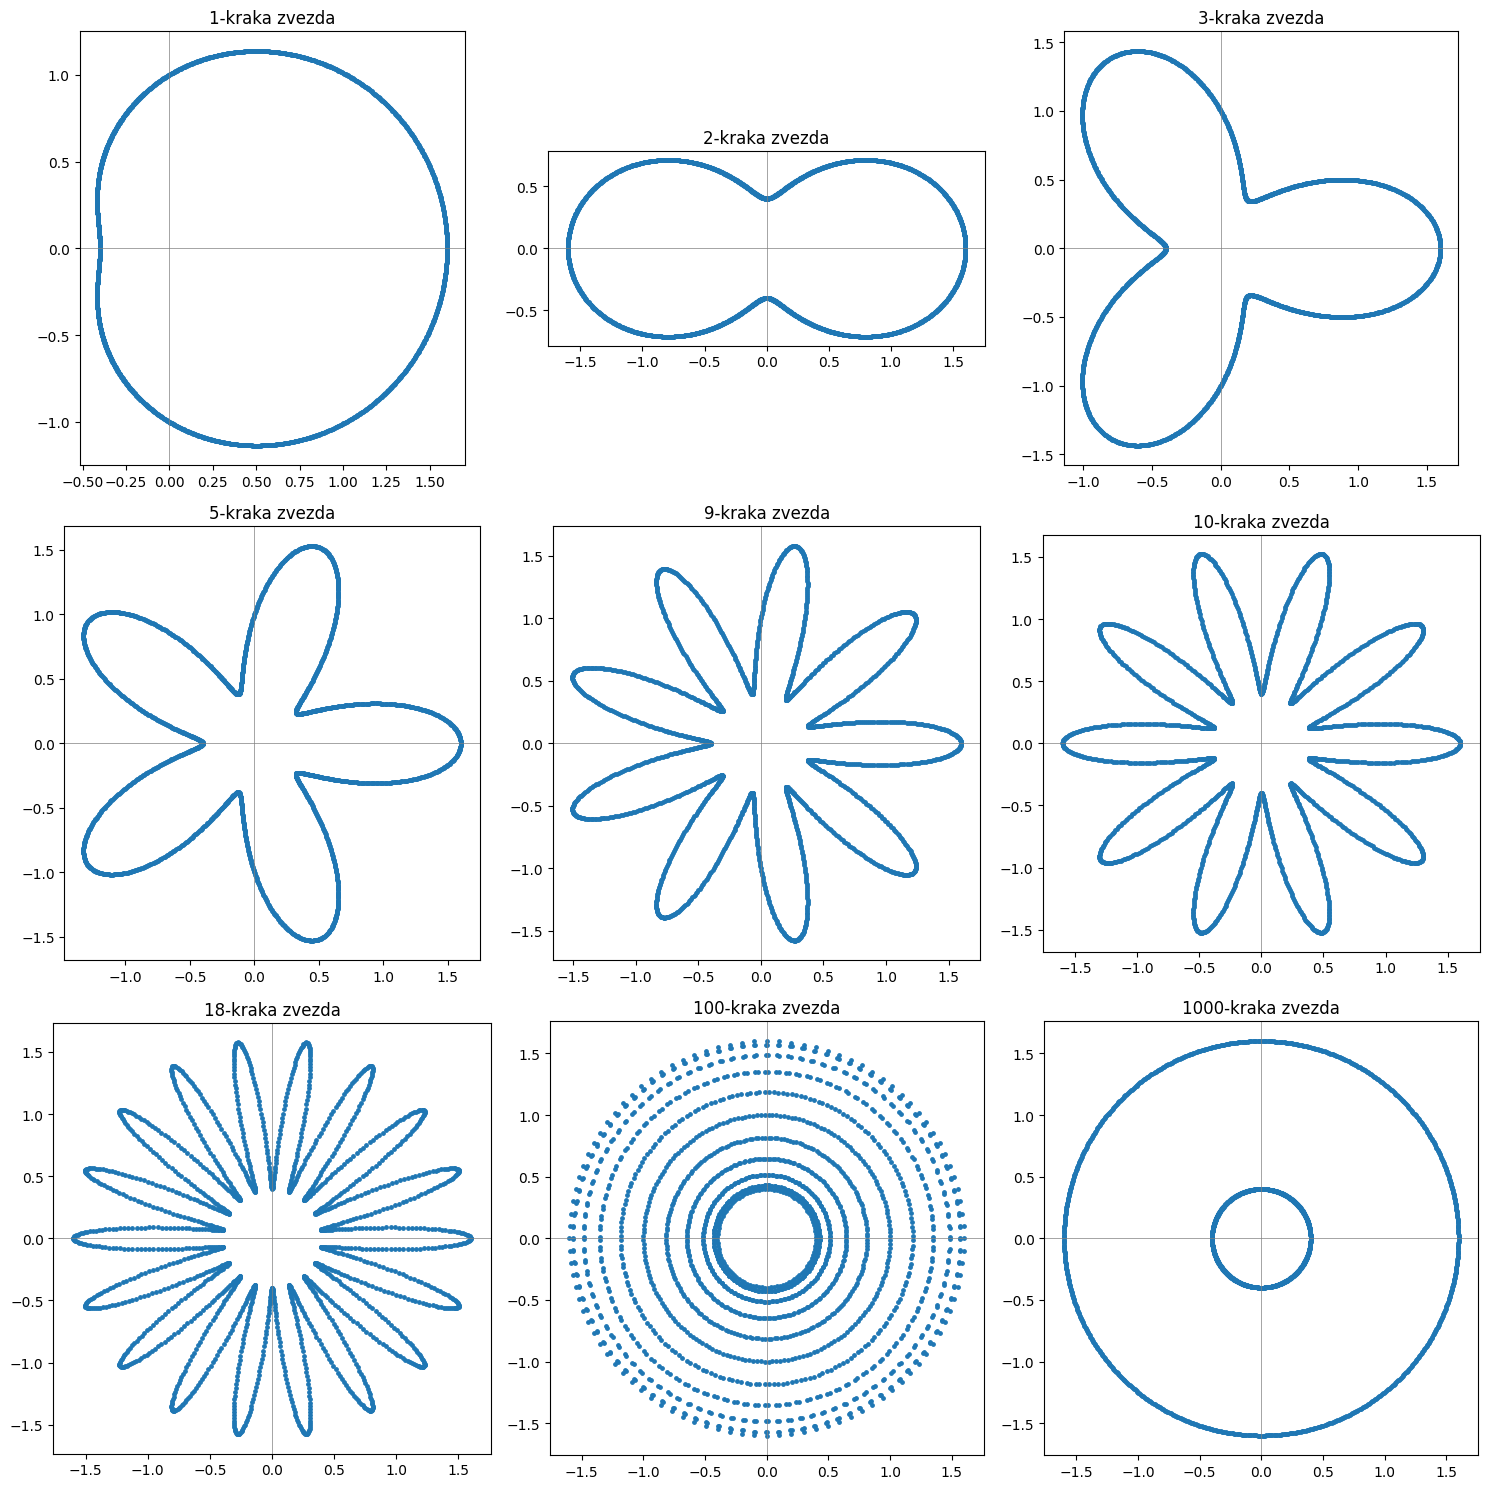

In [96]:
# spreminjamo št. krakov
n = 2000

# seznam števila krakov za 9 grafov
m_list = [1,2,3, 5,9,10,18, 100, 1000]

ncols = 3
nrows = 3

plt.figure(figsize=(5*ncols,5*nrows))

for idx, m in enumerate(m_list, 1):
    k = np.arange(n)
    theta = 2*np.pi*k/n
    rad = 1.0 + 0.6 * np.cos(m * theta)  # radialna modulacija
    lam = rad * np.exp(1j * theta)
    c = ifft(lam)
    recons = fft(c)
    
    plt.subplot(nrows, ncols, idx)
    plt.scatter(recons.real, recons.imag, s=6)
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.title(f"{m}-kraka zvezda")

plt.tight_layout()
plt.show()

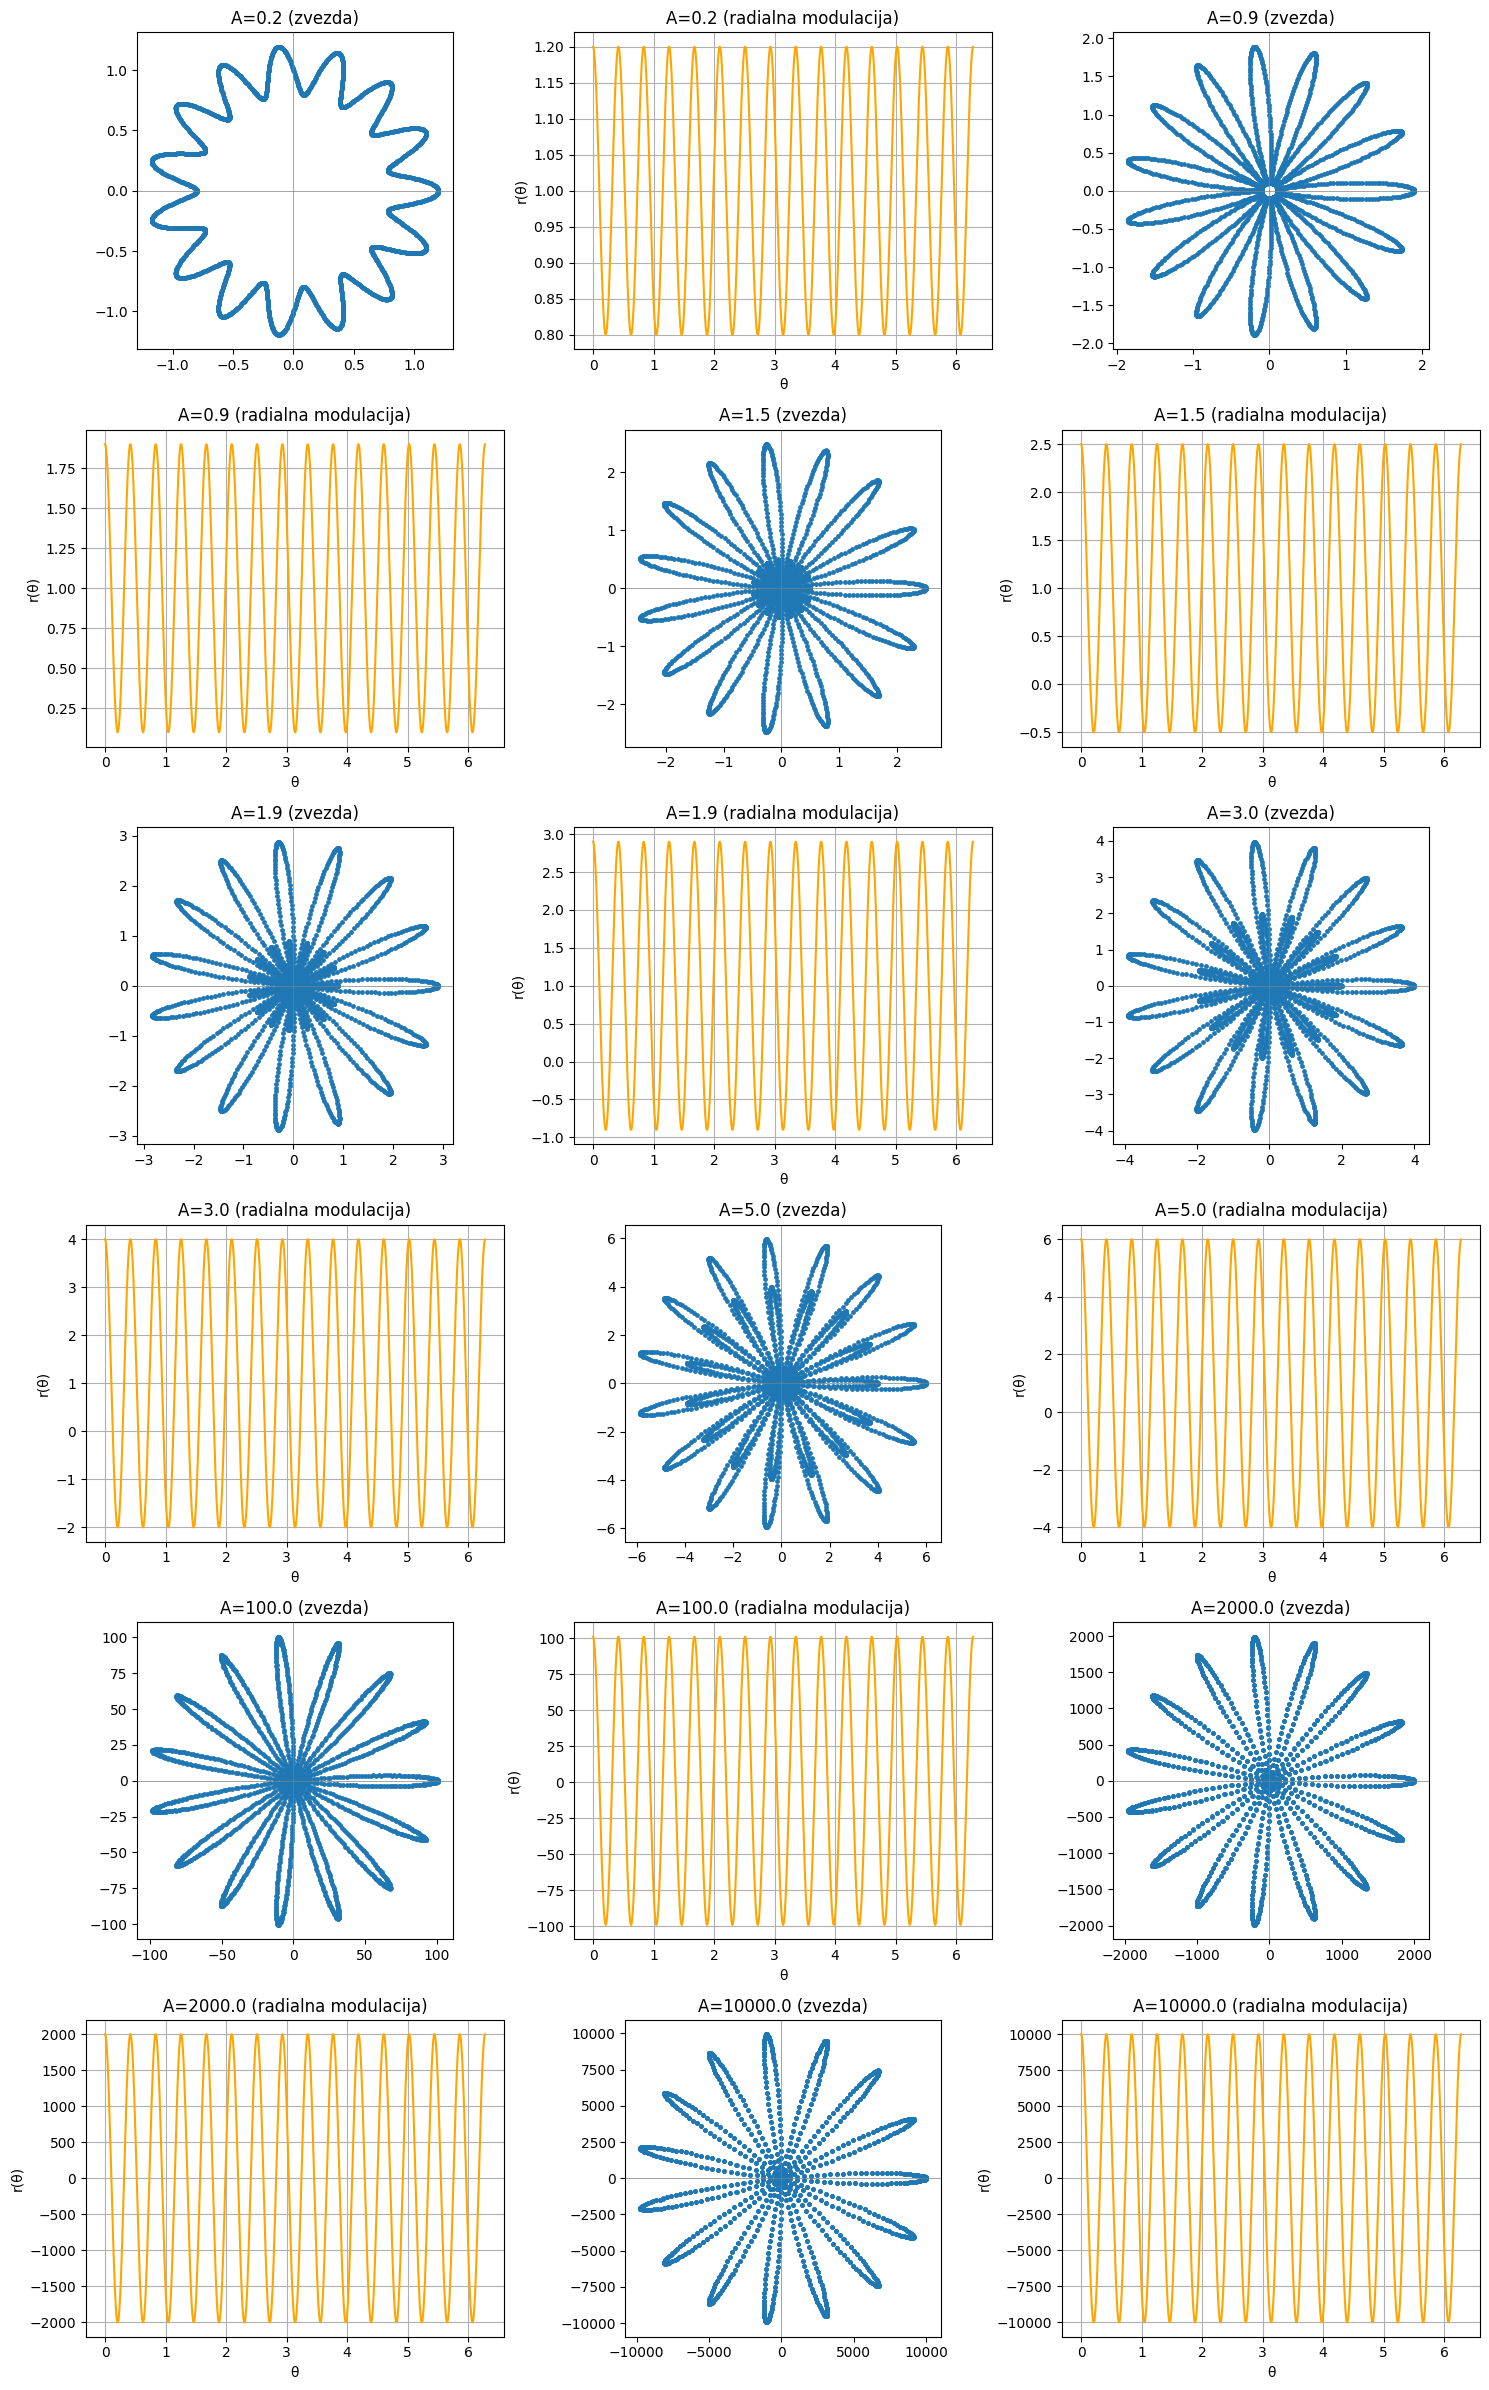

In [ ]:
n = 2000
m = 15  # število krakov

# 9 različnih amplitud
A_list = [0.2,0.9, 1.5, 1.9, 3, 5, 100, 2000, 10000] 

ncols = 3
nrows = 6 

plt.figure(figsize=(5*ncols,4*nrows))

for idx, A in enumerate(A_list, 1):
    k = np.arange(n)
    theta = 2*np.pi*k/n
    rad = 1.0 + A * np.cos(m * theta)
    lam = rad * np.exp(1j * theta)
    c = ifft(lam)
    recons = fft(c)
    
    # graf zvezde 
    plt.subplot(nrows, ncols, 2*idx-1)
    plt.scatter(recons.real, recons.imag, s=6)
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.title(f"A={A:.1f} (zvezda)")

    # graf radialne modulacije
    plt.subplot(nrows, ncols, 2*idx)
    plt.plot(theta, rad, color='orange')
    plt.title(f"A={A:.1f} (radialna modulacija)")
    plt.xlabel("θ")
    plt.ylabel("r(θ)")
    plt.grid(True)

plt.tight_layout()
plt.show()

Opazimo: Oblika pri zelo majhnih amplitudah spominja na krog. Z večanjem amplitude se kraki ostrijo in postajajo vse bolj izraziti. Bolj kot gre razmerje A/rad proti 1, bolj so špičasti kraki.

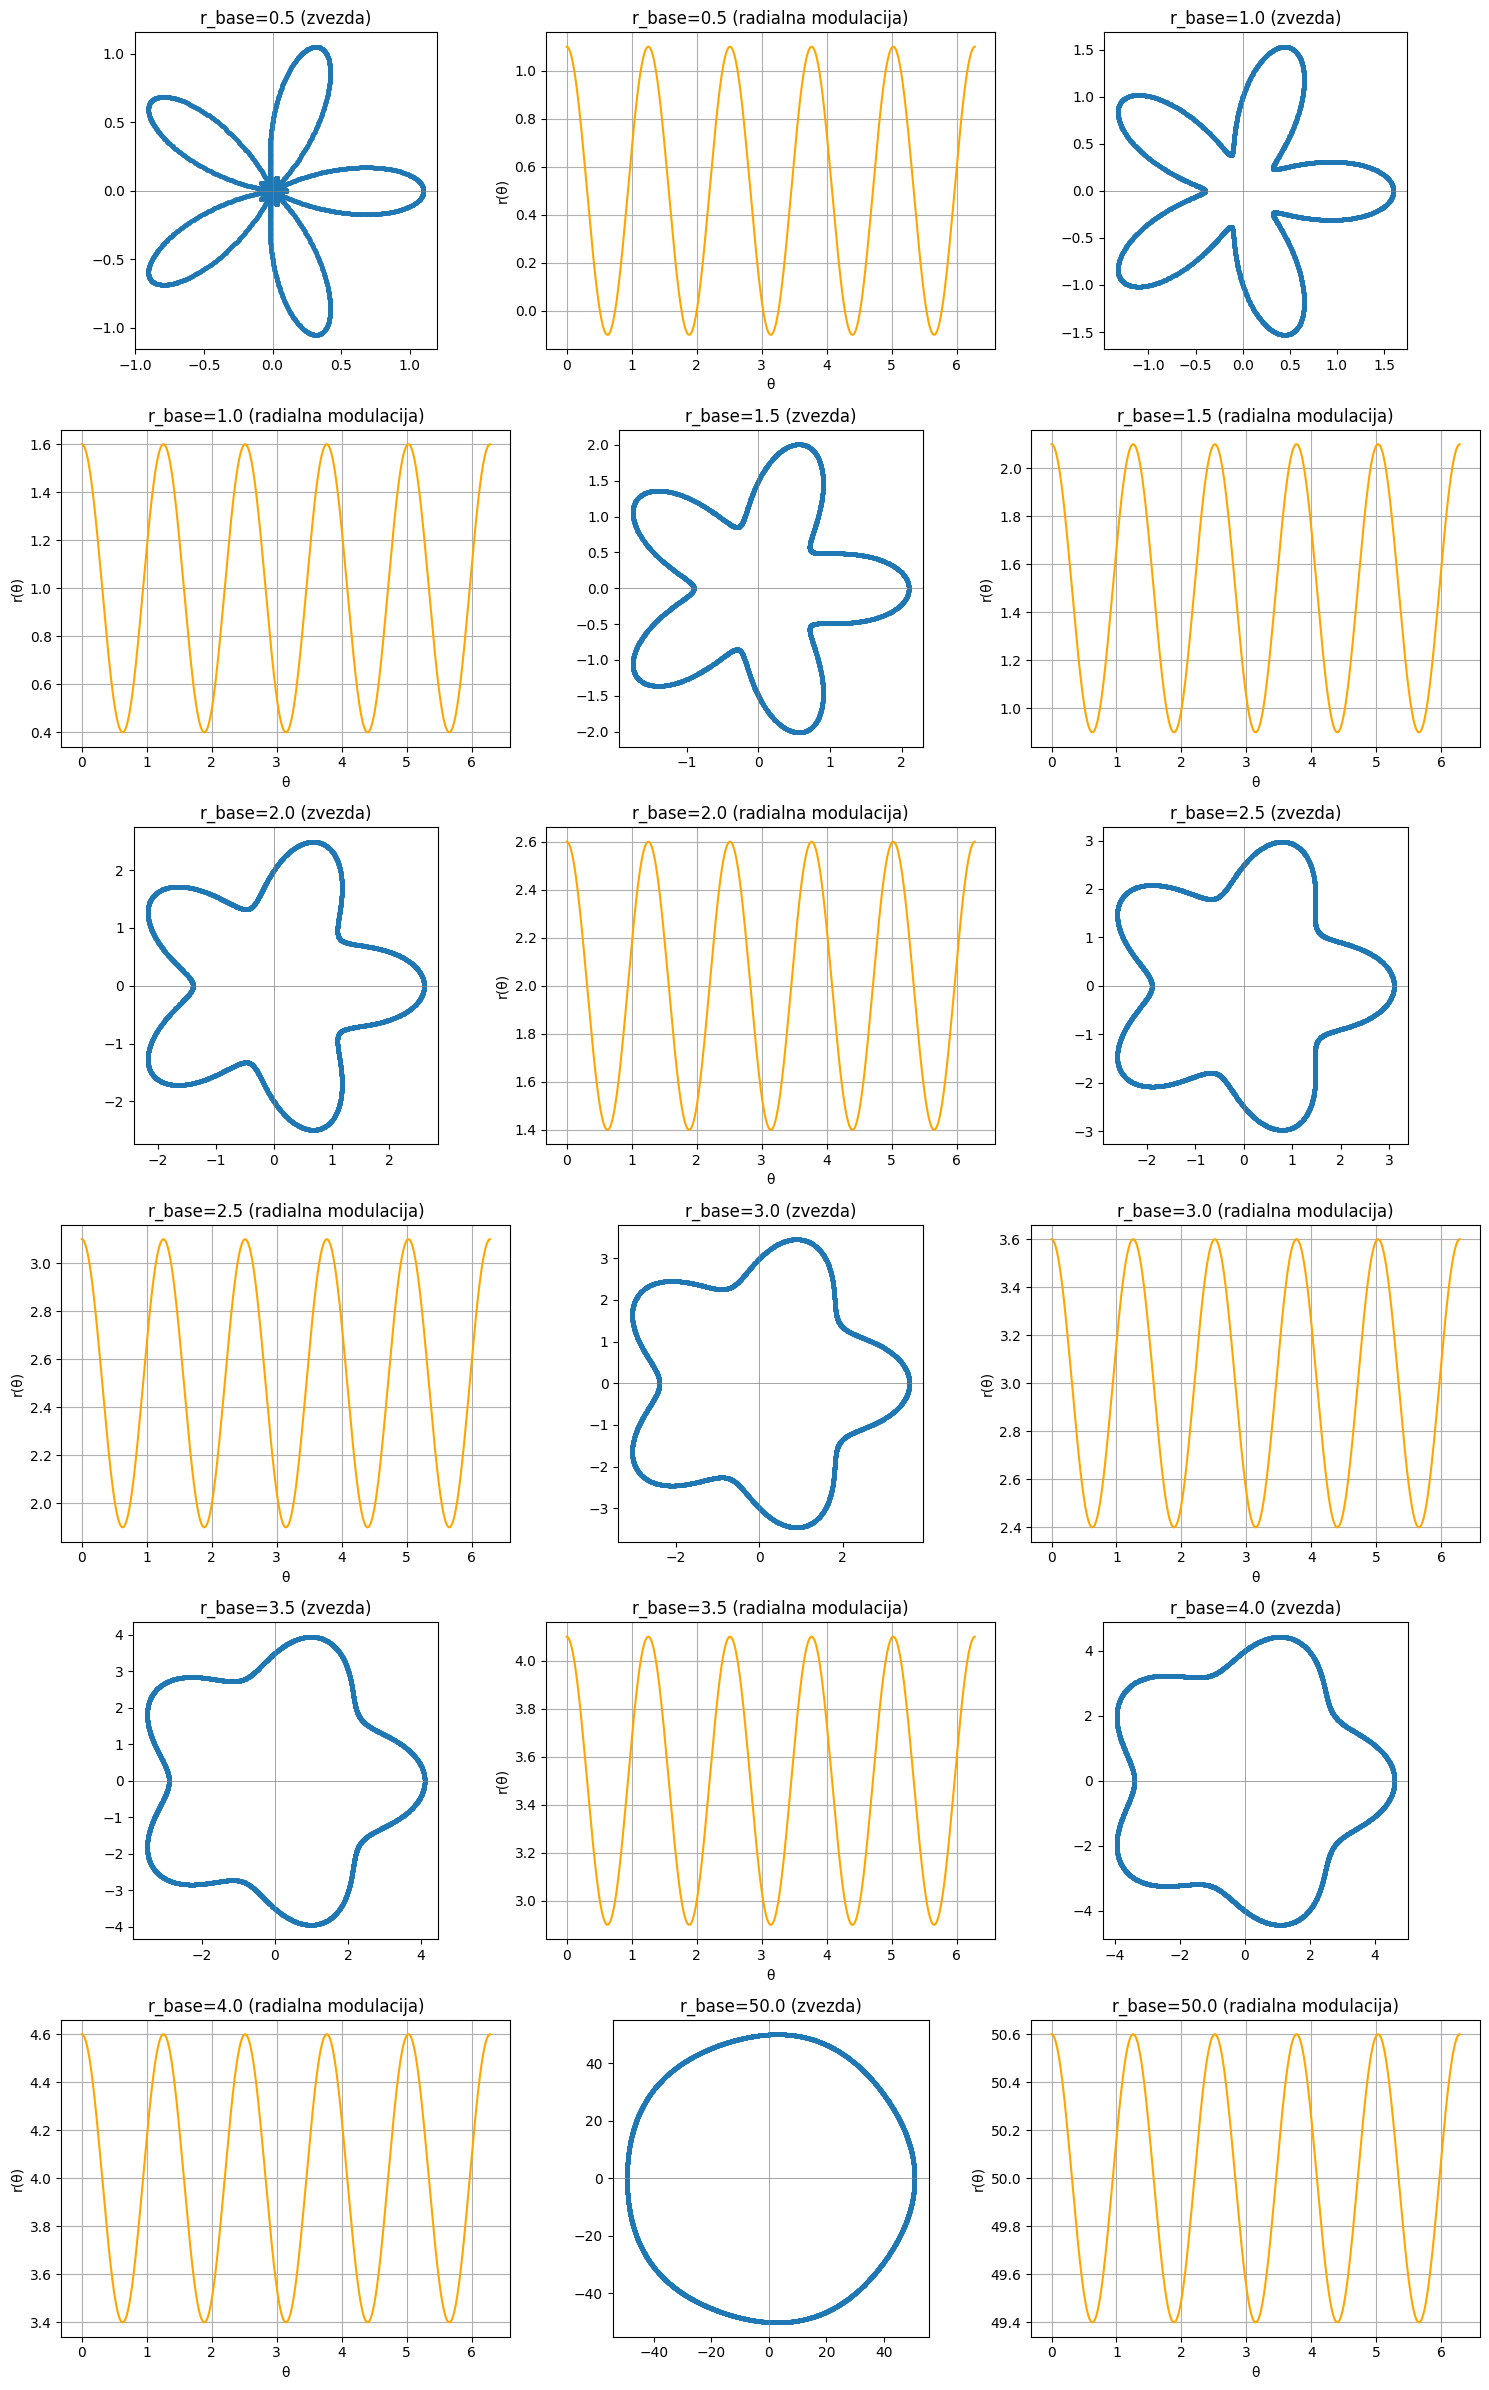

In [95]:
n = 2000
m = 5   # število krakov
A = 0.6 # amplituda krakov
rad_list = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,50]

ncols = 3
nrows = 6  

plt.figure(figsize=(5*ncols, 4*nrows))

for idx, r_base in enumerate(rad_list, 1):
    k = np.arange(n)
    theta = 2*np.pi*k/n
    rad = r_base + A * np.cos(m * theta)  # radialna modulacija
    lam = rad * np.exp(1j * theta)
    c = ifft(lam)
    recons = fft(c)
    
    # ---- graf zvezde ----
    plt.subplot(nrows, ncols, 2*idx-1)
    plt.scatter(recons.real, recons.imag, s=6)
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.gca().set_aspect('equal', 'box')
    plt.title(f"r_base={r_base:.1f} (zvezda)")

    # ---- graf radialne modulacije ----
    plt.subplot(nrows, ncols, 2*idx)
    plt.plot(theta, rad, color='orange')
    plt.title(f"r_base={r_base:.1f} (radialna modulacija)")
    plt.xlabel("θ")
    plt.ylabel("r(θ)")
    plt.grid(True)

plt.tight_layout()
plt.show()

Podobno kot prej: za r < A, so kraki izraziti. Ko r preseže A in se še naprej povečuje, se njuno razmerje manjša, so kraki vse manjši in oblika se vse bolj približuje krogu.

Rose curve je


$$
r(\theta) = r_a + A \cos(m \theta)
$$


 $r_a$ = osnovni radij  
 $A$ = amplituda krakov  
 $m$ = število krakov  


Na kompleksni ravnini


$$
z(\theta) = r(\theta) e^{i \theta} = (r_a + A \cos(m\theta)) e^{i\theta}.
$$

Če želimo, da lastne vrednosti $\lambda_k$ tvorijo zvezdo, vzamemo

$$
\theta_k = \frac{2\pi k}{n}, \quad k = 0,1,\dots,n-1
$$


in definiramo


$$
\lambda_k = (r_a + A \cos(m \theta_k)) e^{i \theta_k}.
$$ 

**5. Generiranje parametričnih cirkulantnih matrik**

C:\Users\amand\AppData\Local\Temp\ipykernel_12736\589426099.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


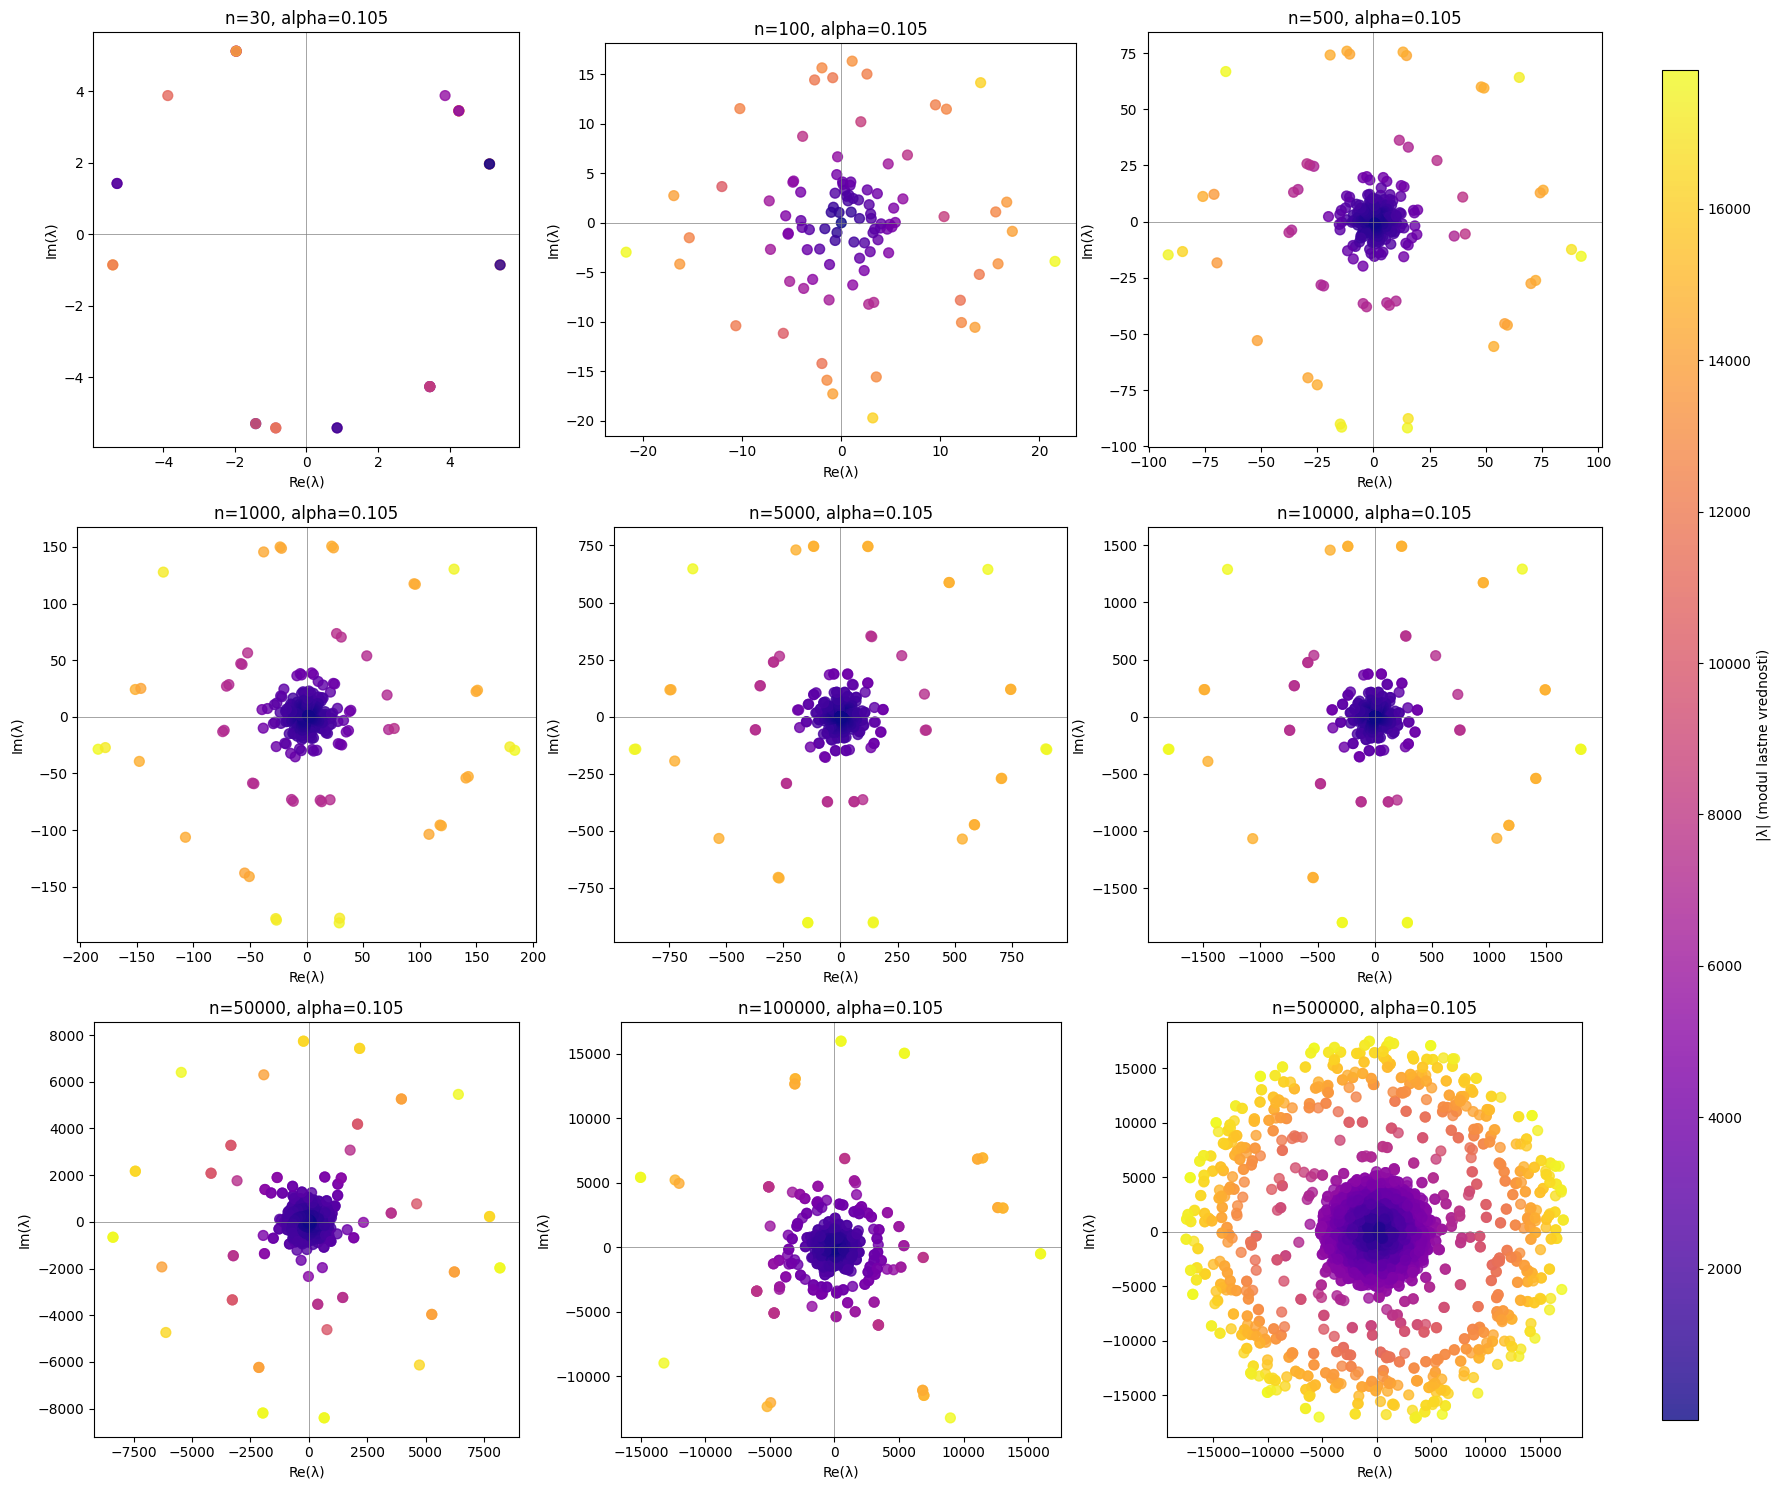

In [ ]:
def plot_parametric_circulant_on_axes(n, alpha, ax):
    """
    Lastne vrednosti cirkulantne matrike s prvo vrstico
    c_j = exp(i * alpha * j^2)
    """
    j = np.arange(n)
    c = np.exp(1j * alpha * j**2)  # parametrična prva vrstica
    
    eigvals = fft(c)
    moduli = np.abs(eigvals)
    
    scatter = ax.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=50, alpha=0.8)
    ax.axhline(0, color="gray", lw=0.5)
    ax.axvline(0, color="gray", lw=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_title(f"n={n}, alpha={alpha:.3f}")
    ax.set_xlabel("Re(λ)")
    ax.set_ylabel("Im(λ)")
    return scatter

ns = [30, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
alpha = np.pi/30

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

scatters = []
for i, n in enumerate(ns):
    scatter = plot_parametric_circulant_on_axes(n, alpha, axes[i])
    scatters.append(scatter)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.9])
cbar = fig.colorbar(scatters[-1], cax=cbar_ax)
cbar.set_label("|λ| (modul lastne vrednosti)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


Opazimo, da grafi tvorijo spirale.

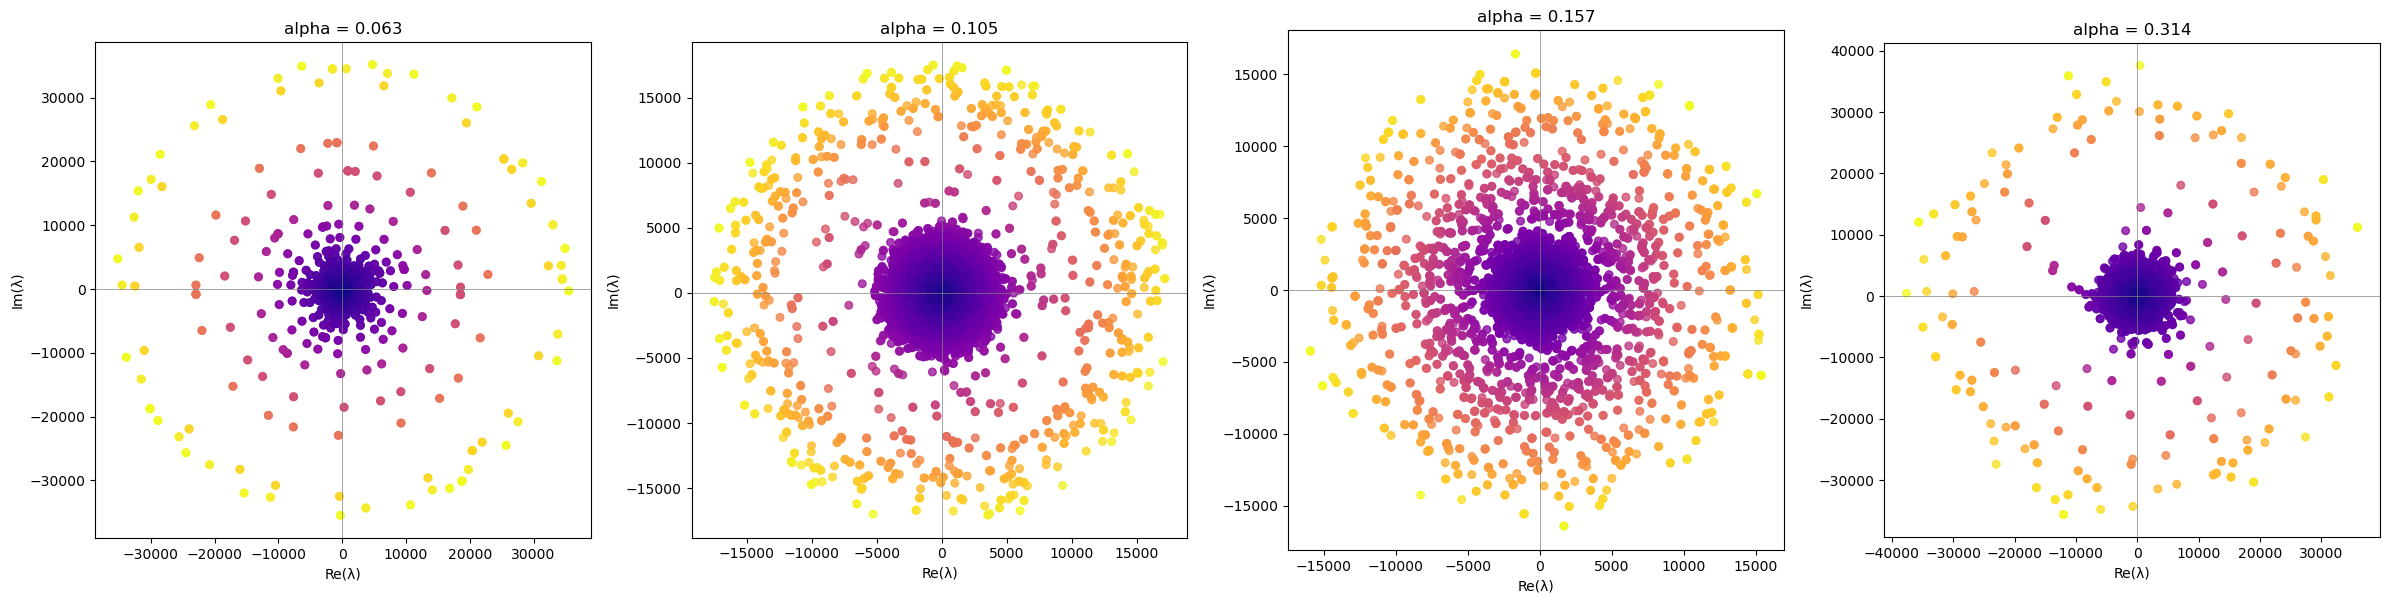

In [ ]:
def plot_parametric_circulant_multi_alpha(n, alphas):
    j = np.arange(n)
    
    plt.figure(figsize=(6*len(alphas),6))
    
    for idx, alpha in enumerate(alphas, 1):
        c = np.exp(1j * alpha * j**2)
        eigvals = fft(c)
        moduli = np.abs(eigvals)
        
        plt.subplot(1, len(alphas), idx)
        plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=30, alpha=0.8)
        plt.axhline(0, color="gray", lw=0.5)
        plt.axvline(0, color="gray", lw=0.5)
        plt.gca().set_aspect('equal', 'box')
        plt.title(f"alpha = {alpha:.3f}")
        plt.xlabel("Re(λ)")
        plt.ylabel("Im(λ)")
    
    plt.tight_layout()
    plt.show()

n = 500000
alphas = [np.pi/50, np.pi/30, np.pi/20, np.pi/10]
plot_parametric_circulant_multi_alpha(n, alphas)


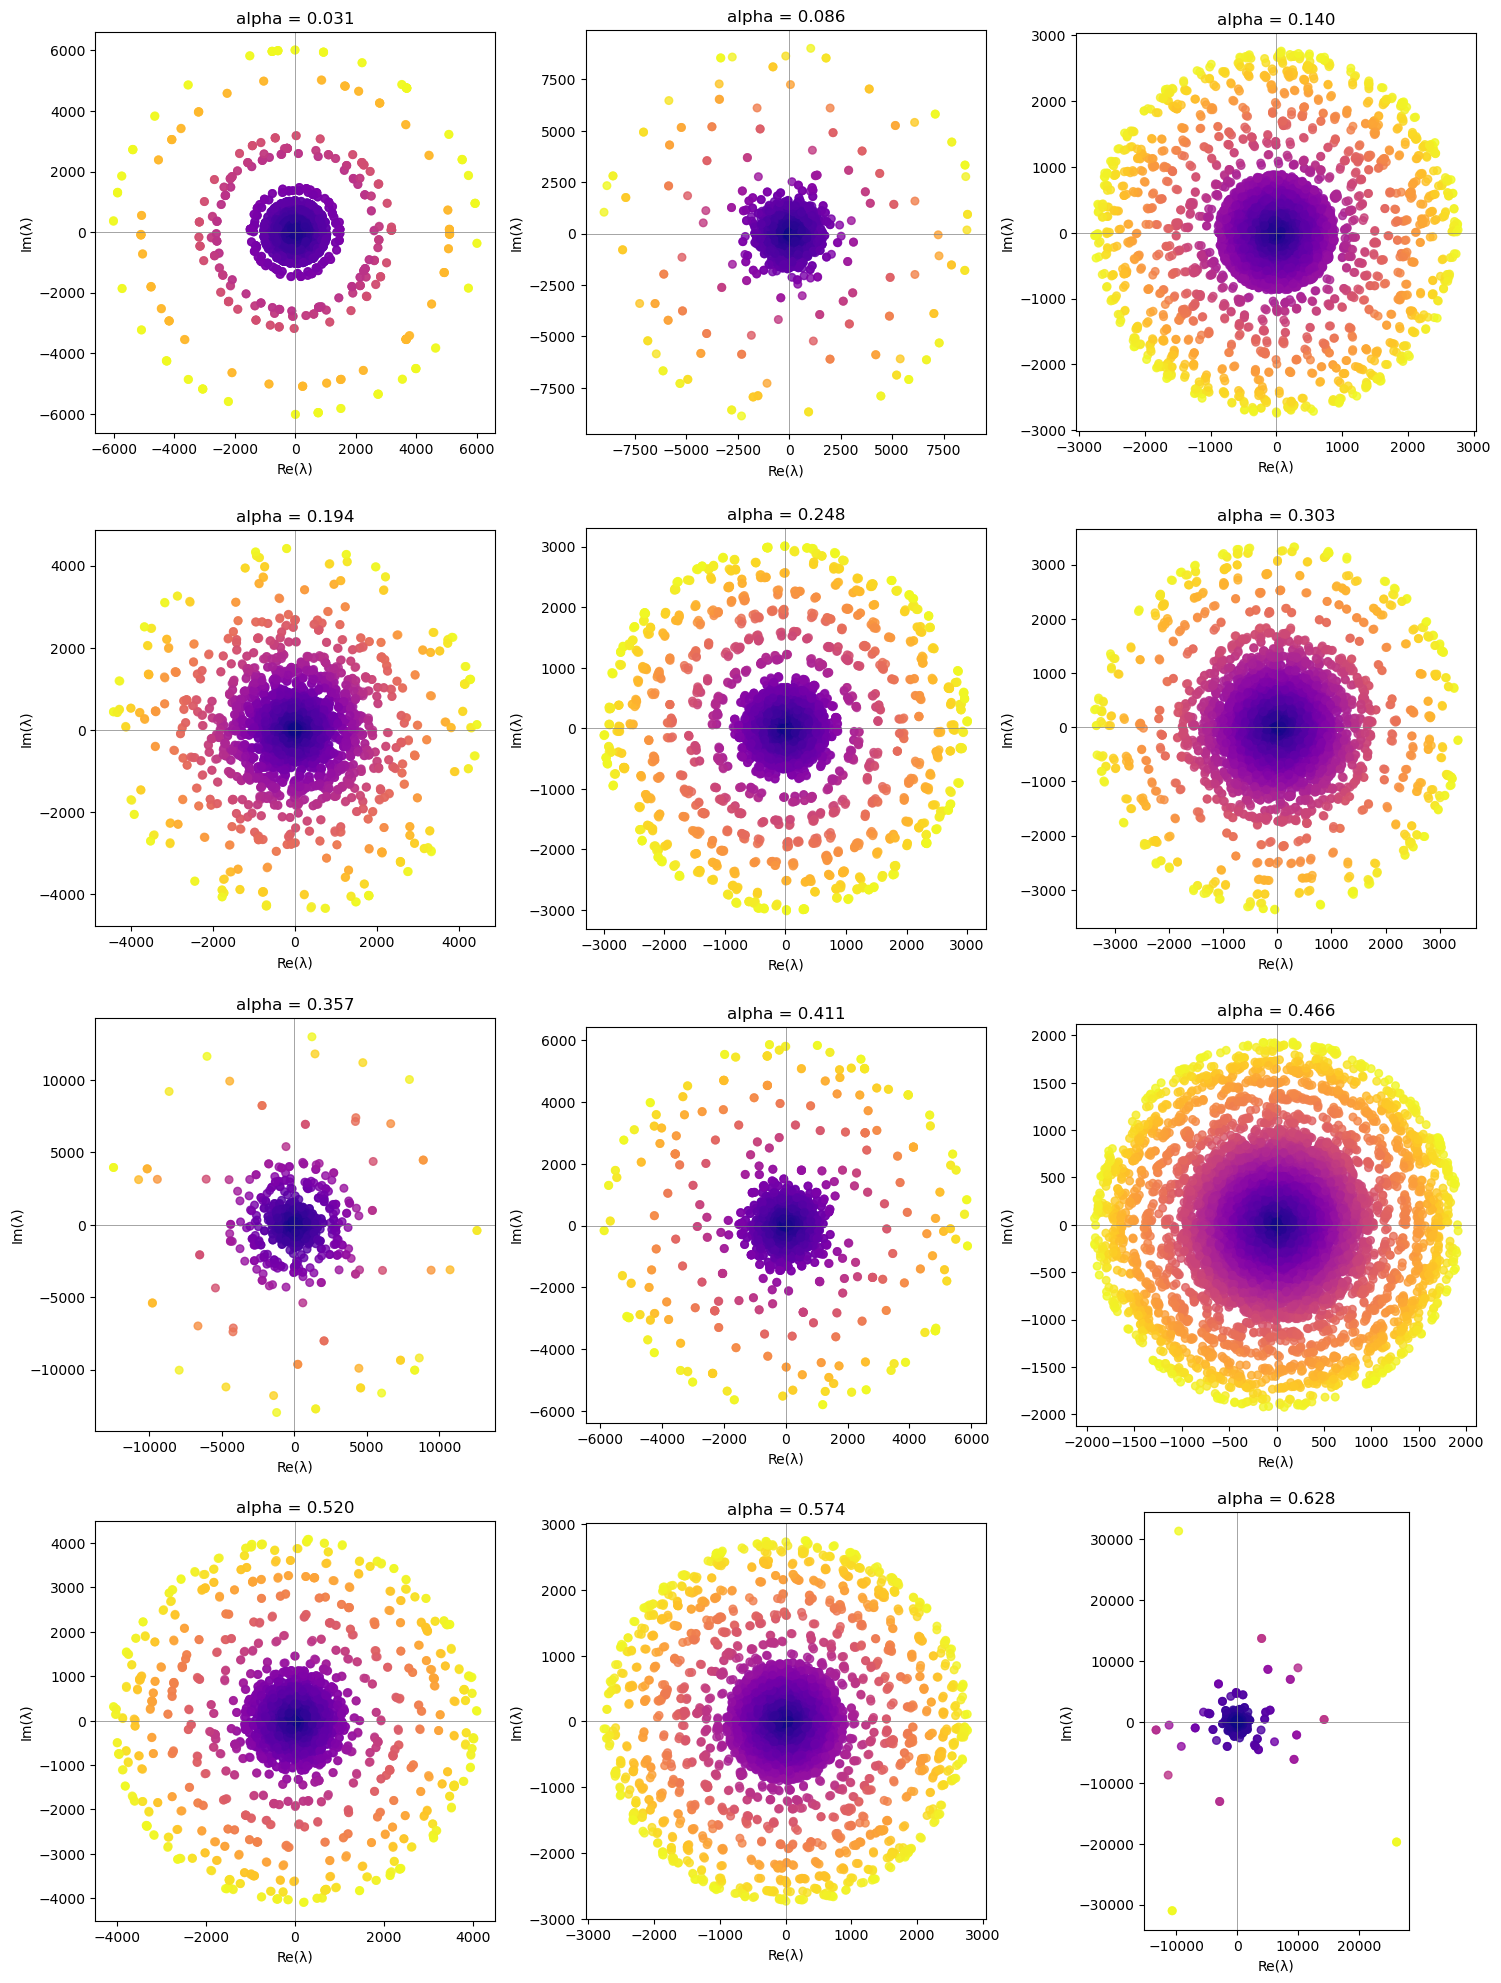

In [ ]:
def plot_parametric_circulant_grid(n, alphas, ncols=3):
    """
    Prikaže mrežo grafov lastnih vrednosti za različne alpha.
    
    n      : dimenzija matrike
    alphas : seznam alfa vrednosti
    ncols  : število grafov v vrstici
    """
    nplots = len(alphas)
    nrows = int(np.ceil(nplots / ncols))
    
    plt.figure(figsize=(5*ncols, 5*nrows))
    
    j = np.arange(n)
    
    for idx, alpha in enumerate(alphas, 1):
        c = np.exp(1j * alpha * j**2)
        eigvals = fft(c)
        moduli = np.abs(eigvals)
        
        plt.subplot(nrows, ncols, idx)
        plt.scatter(eigvals.real, eigvals.imag, c=moduli, cmap="plasma", s=30, alpha=0.8)
        plt.axhline(0, color="gray", lw=0.5)
        plt.axvline(0, color="gray", lw=0.5)
        plt.gca().set_aspect('equal', 'box')
        plt.title(f"alpha = {alpha:.3f}")
        plt.xlabel("Re(λ)")
        plt.ylabel("Im(λ)")
    
    plt.tight_layout()
    plt.show()

n = 100000
alphas = np.linspace(np.pi/100, np.pi/5, 12)  
plot_parametric_circulant_grid(n, alphas, ncols=3)


## Generiranje nehomogeno porazdeljenih cirkulantnih matrik 

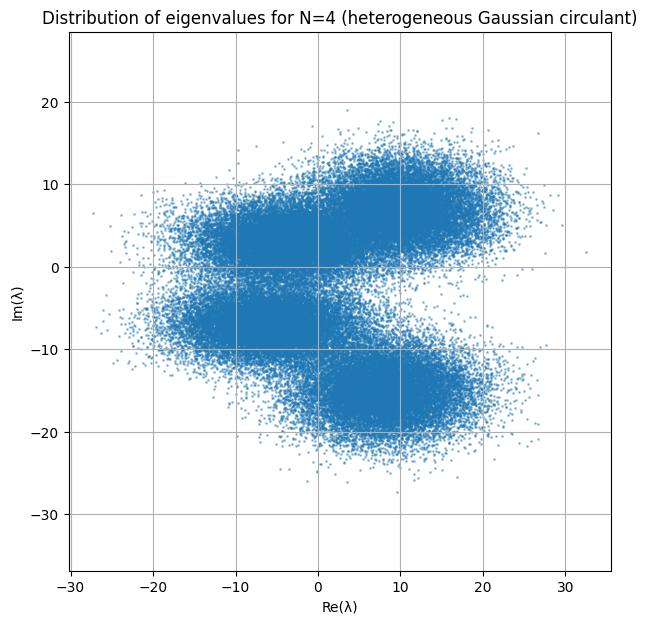

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant

# -----------------------------
# Parameters from Fig. 14
# -----------------------------
u = np.array([2, 6, -7, -5])
sigma = np.array([5, 2, 0.5, 4/3])

v = np.array([-3, 2, 1, 3])
tau = np.array([7/4, 3/2, 1/4, 5/6])

N = 4
num_samples = 20000

eigs = []

for _ in range(num_samples):
    # generate first rows of A and B
    a0 = np.random.normal(u, sigma)
    b0 = np.random.normal(v, tau)
    
    # circulant matrices
    A = circulant(a0)
    B = circulant(b0)
    
    H = A + 1j * B
    
    # eigenvalues
    w = np.linalg.eigvals(H)
    eigs.append(w)

eigs = np.array(eigs).reshape(-1)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(7,7))
plt.scatter(eigs.real, eigs.imag, s=1, alpha=0.4)
plt.xlabel("Re(λ)")
plt.ylabel("Im(λ)")
plt.title("Distribution of eigenvalues for N=4 (heterogeneous Gaussian circulant)")
plt.grid(True)
plt.axis("equal")
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant

def draw_eigs(N=8, samples=5000, distribution="gaussian",
              meanA=None, stdA=None, meanB=None, stdB=None,
              periodic_freq=3):
    """
    Universal generator of eigenvalue scatter images of random circulant matrices.
    """

    eigs = []

    # Default Gaussian case (if no parameters provided)
    if meanA is None:
        meanA = np.zeros(N)
    if stdA is None:
        stdA = np.ones(N)
    if meanB is None:
        meanB = np.zeros(N)
    if stdB is None:
        stdB = np.ones(N)

    # Define random draw depending on chosen distribution
    def draw(dist, mean, scale):
        if dist == "gaussian":
            return np.random.normal(mean, scale)

        if dist == "uniform":
            return np.random.uniform(mean - scale, mean + scale)

        if dist == "laplace":
            return np.random.laplace(mean, scale)

        if dist == "cauchy":
            return mean + scale * np.random.standard_cauchy()

        if dist == "rademacher":
            return mean + scale * np.random.choice([-1, 1])

        if dist == "mixture":
            if np.random.rand() < 0.5:
                return np.random.normal(mean, scale)
            else:
                return np.random.uniform(mean - scale, mean + scale)

        if dist == "periodic":
            # periodic means you deliberately modulate the first row
            k = np.arange(N)
            return mean + scale * np.sin(2*np.pi*periodic_freq*k/N + 
                                         np.random.rand()*2*np.pi)

        raise ValueError("Unknown distribution")

    # MAIN LOOP
    for _ in range(samples):
        # draw first rows of A and B
        a0 = draw(distribution, meanA, stdA)
        b0 = draw(distribution, meanB, stdB)

        # circulant matrices
        A = circulant(a0)
        B = circulant(b0)

        H = A + 1j * B
        w = np.linalg.eigvals(H)

        eigs.append(w)

    eigs = np.array(eigs).reshape(-1)

    # PLOT
    plt.figure(figsize=(7,7))
    plt.scatter(eigs.real, eigs.imag, s=2, alpha=0.4)
    plt.title(f"Circ. eigenvalue pattern ({distribution})")
    plt.xlabel("Re(λ)")
    plt.ylabel("Im(λ)")
    plt.axis("equal")
    plt.grid(True)
    plt.show()

    return eigs


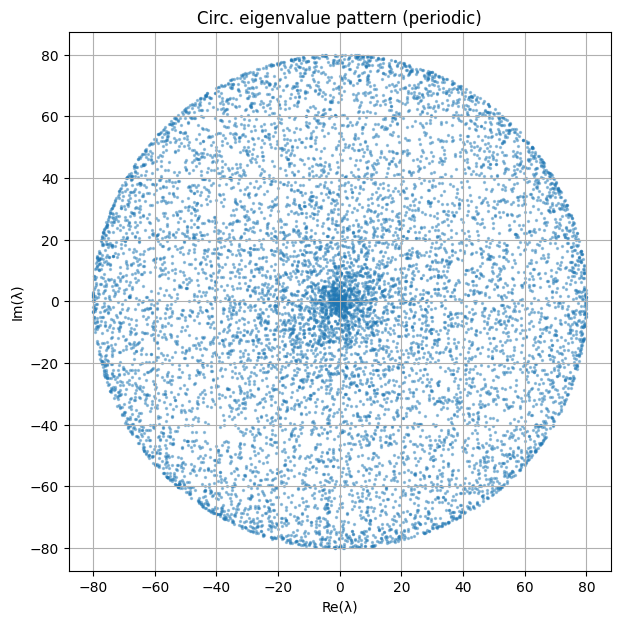

array([-4.17319828e+01+4.25649659e+01j,  3.80980225e+01-3.73524560e+01j,
        2.17212369e-14+8.89023481e-15j, ...,
        1.42326987e-15-2.03688673e-16j,  3.81062494e-15-1.89754092e-16j,
        5.60031832e-15-2.11767939e-15j])

In [8]:
draw_eigs(N=80, samples=5000, distribution="periodic", periodic_freq=5)


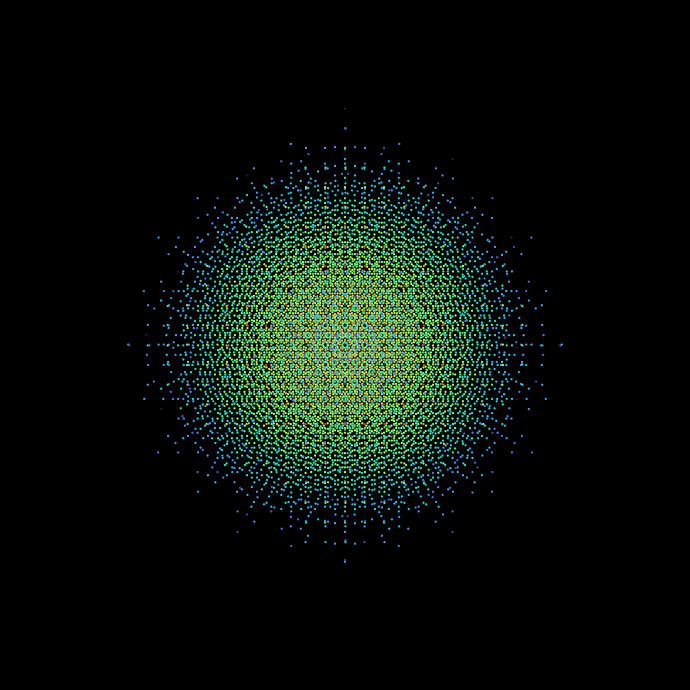

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# parametri
n = 12 # dimenzija cirkulantnih matrik
num_samples = 300_000      # število naključnih matric (po potrebi spremeni)
values = np.array([0, 1, -1, 1j, -1j, 2, -2, 2j, -2j], dtype=complex)

all_eigs = []

for _ in range(num_samples):
    c = np.zeros(n, dtype=complex)  # prvi stolpec cirkulantne matrike

    # "inverted checkerboard": samo sodi indeksi so lahko nenicelni
    for j in range(0, n, 2):
        c[j] = np.random.choice(values)

    # lastne vrednosti cirkulantne matrike: FFT prvega stolpca
    lam = np.fft.fft(c)
    all_eigs.append(lam)

all_eigs = np.concatenate(all_eigs)
x = all_eigs.real
y = all_eigs.imag

# slikanje gostote
fig, ax = plt.subplots(figsize=(7, 7), facecolor="black")
ax.set_facecolor("black")

hb = ax.hexbin(x, y,
               gridsize=500,      # mreža (večja = bolj detajlno, počasneje)
               bins="log",        # logaritemska gostota
               cmap="turbo")      # živahne barve

ax.set_aspect("equal", "box")
ax.axis("off")

# okno, v katerem gledaš (po potrebi prilagodiš)
ax.set_xlim(-17, 17)
ax.set_ylim(-17, 17)

plt.tight_layout()
plt.show()


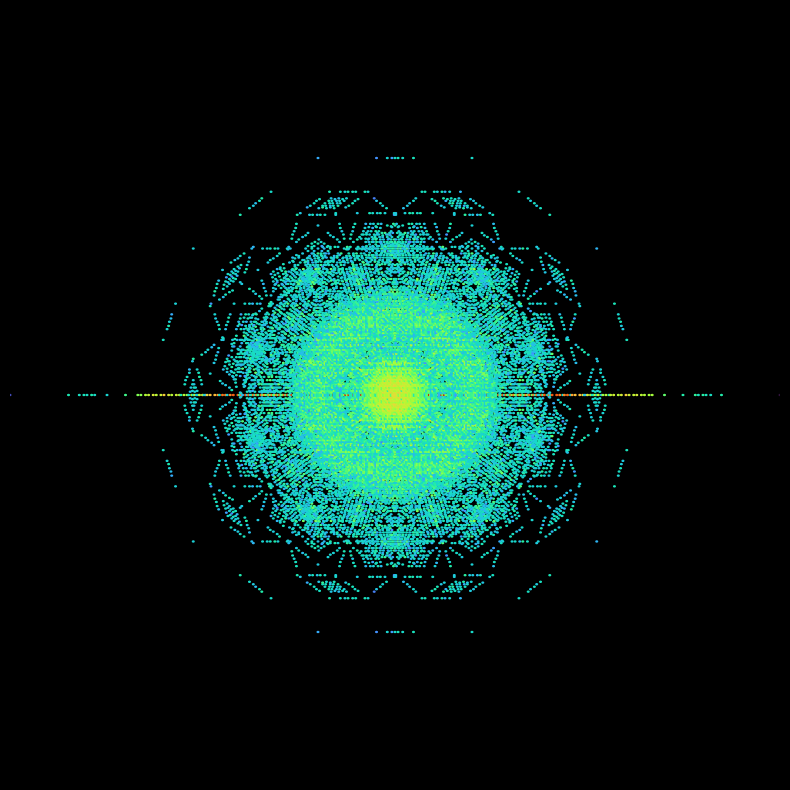

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# VEČJI in BOLJ RAZNOLIK nabor vrednosti = lepše slike
values = np.array([-20, -5, -2, -1, 0, 1, 2, 5, 20], dtype=float)

n = 5                      # dimenzija cirkulantne matrike (poskusi 5, 6, 7, 9...)
num_mats = 200_000         # veliko vzorcev = gost vzorec

all_eigs = []

for _ in range(num_mats):
    first_row = np.random.choice(values, size=n)
    eigs = np.fft.fft(first_row)
    all_eigs.append(eigs)

all_eigs = np.concatenate(all_eigs)
x = all_eigs.real
y = all_eigs.imag

fig, ax = plt.subplots(figsize=(8, 8), facecolor="black")
ax.set_facecolor("black")

hb = ax.hexbin(x, y,
               gridsize=500,
               bins="log",
               cmap="turbo")

ax.set_aspect("equal", "box")
ax.axis("off")

# velik zoom OUT – da res vidiš sliko
R = max(np.max(np.abs(x)), np.max(np.abs(y)))
ax.set_xlim(-R, R)
ax.set_ylim(-R, R)

plt.tight_layout()
plt.show()


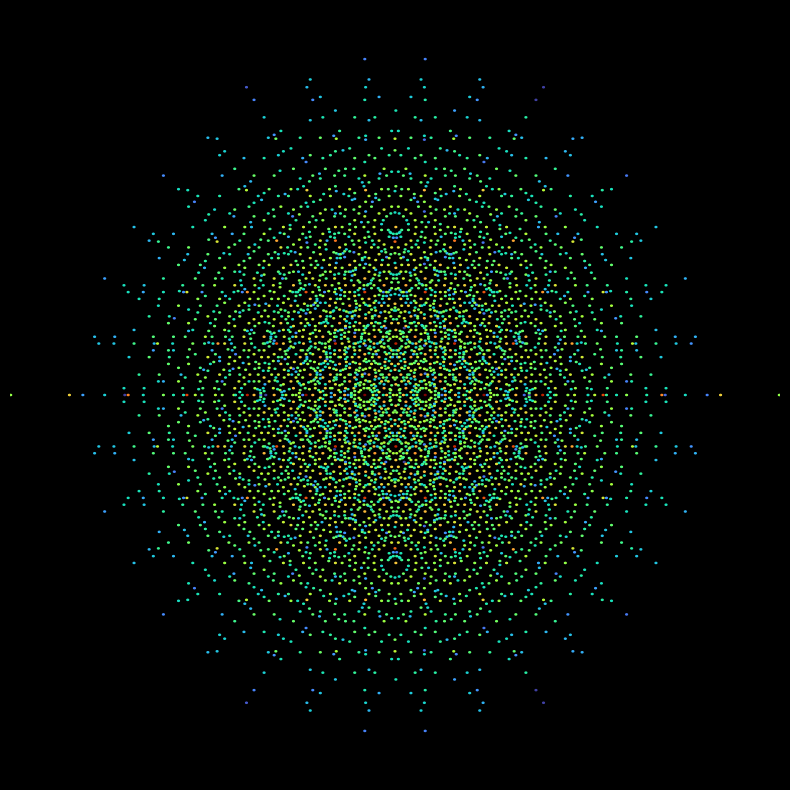

In [51]:
import numpy as np
import matplotlib.pyplot as plt

n = 18
values = np.array([-1, 1])
num_mats = 100_000    # lahko več/ manj, odvisno od hitrosti

all_eigs = []

for _ in range(num_mats):
    first_row = np.zeros(n)
    first_row[1] = 1.0                # "subdiagonala" v cirkulantnem smislu
    first_row[2:] = np.random.choice(values, size=n-2)

    # lastne vrednosti CIRKULANTNE matrike = FFT prve vrstice
    eigs = np.fft.fft(first_row)
    all_eigs.append(eigs)

all_eigs = np.concatenate(all_eigs)
x, y = all_eigs.real, all_eigs.imag

fig, ax = plt.subplots(figsize=(8, 8), facecolor="black")
ax.set_facecolor("black")

hb = ax.hexbin(x, y,
               gridsize=600,
               bins="log",
               cmap="turbo")

ax.set_aspect("equal", "box")
ax.set_xlim(-13, 13)
ax.set_ylim(-13, 13)
ax.axis("off")

plt.tight_layout()
plt.show()
